# FASE 0: DATASET EXPLORATION KOMPREHENSIF


# Latar Belakang Masalah

Kehidupan mahasiswa seringkali diidentikkan dengan tuntutan akademik yang tinggi, tenggat waktu yang ketat, dan tekanan untuk berprestasi. Kondisi ini tidak jarang mendorong mahasiswa untuk mengorbankan pilar-pilar penting dari kesejahteraan, terutama kualitas tidur dan kesehatan mental, demi mendapatkan jam belajar tambahan. Muncul pertanyaan krusial: apakah pengorbanan ini sepadan dan efektif? Apakah mengurangi waktu tidur dan menahan tingkat stres yang tinggi benar-benar mengarah pada kesuksesan akademik, atau justru menjadi bumerang yang kontraproduktif?

Proyek ini, yang diilhami oleh tema kompetisi **"Enhance Health, Enrich Learning"**, bertujuan untuk menginvestigasi hubungan kompleks antara kesehatan (tidur), kesejahteraan mental (stres), dan efektivitas belajar (pencapaian akademik). Kami berhipotesis bahwa kesejahteraan bukanlah sebuah kemewahan yang bisa ditukar dengan prestasi, melainkan fondasi fundamental untuk mencapainya.

## Tujuan Analisis

Berdasarkan latar belakang tersebut, analisis ini memiliki beberapa tujuan utama:

* **Menganalisis Dampak Kesejahteraan**: Mengukur dan menganalisis secara statistik dampak kualitas tidur (diukur dengan PSQI) dan tingkat distres psikologis (diukur dengan K10) terhadap pencapaian akademik mahasiswa (diukur dengan GAP).
* **Mengidentifikasi Faktor-Faktor Kunci**: Mengidentifikasi faktor-faktor gaya hidup dan demografi lainnya (seperti jam belajar, konsumsi kafein, pekerjaan tambahan, dan tingkat akademik) yang secara signifikan mempengaruhi baik kesejahteraan maupun prestasi mahasiswa.
* **Menemukan Profil Mahasiswa**: Mengelompokkan mahasiswa ke dalam profil-profil (klaster) yang berbeda berdasarkan kombinasi karakteristik kesejahteraan, akademik, dan gaya hidup mereka untuk memahami adanya segmen dengan kebutuhan yang beragam.
* **Mengembangkan Solusi Berbasis Data**: Merancang dan memprototipekan sebuah *dashboard* interaktif sebagai solusi untuk menyajikan *insight* yang telah ditemukan. Tujuan akhirnya adalah memberikan rekomendasi yang dapat ditindaklanjuti (*actionable*) bagi mahasiswa untuk membantu mereka meningkatkan kesejahteraan dan efektivitas belajar secara simultan.

---

# Dataset dan Metodologi

## Sumber dan Deskripsi Dataset

Analisis ini menggunakan dataset publik yang tersedia di platform Kaggle, yang berisi data survei dari **706 responden mahasiswa**.

* **Sumber**: https://figshare.com/articles/dataset/The_relationship_between_sleep_quality_stress_and_academic_performance_among_Jordanian_medical_students_A_cross_sectional_dataset/25556997?file=45506298
* **Konteks Dataset**: Berdasarkan analisis awal pada kolom `University` (dengan kode seperti JUST, YU, BAU, dll.), dataset ini kemungkinan besar berasal dari survei yang dilakukan pada mahasiswa di beberapa universitas di **Yordania**. Meskipun tidak berasal dari konteks Indonesia, isu mengenai kualitas tidur, stres, dan prestasi akademik mahasiswa adalah fenomena universal, sehingga *insight* yang didapat dari analisis ini tetap memiliki relevansi dan dapat memberikan pelajaran berharga.
* **Struktur Data**: Dataset ini terdiri dari 23 variabel asli yang mencakup:
    * **Variabel Kesejahteraan**: 7 komponen dari **Pittsburgh Sleep Quality Index (PSQI)** untuk mengukur kualitas tidur, dan skor dari **Kessler Psychological Distress Scale (K10)** untuk mengukur tingkat distres psikologis.
    * **Variabel Akademik**: **Grade Average Point (GAP)** sebagai indikator pencapaian akademik, serta variabel pendukung seperti jam belajar harian dan rata-rata jam sekolah.
    * **Variabel Demografi & Gaya Hidup**: Universitas, tingkat akademik, jenis kelamin, kelompok usia, status pernikahan, jenis tempat tinggal, konsumsi kafein, pekerjaan tambahan, uang saku, dan kebiasaan tidur siang.
* **Kualitas Data**: Dataset ini dalam kondisi sangat baik tanpa adanya *missing values* pada observasi yang ada, sehingga memungkinkan analisis yang lebih robust tanpa memerlukan imputasi data yang kompleks.

## Dataset

Dataset dalam format `.csv` diimpor ke dalam lingkungan kerja Python menggunakan library **Pandas**. Semua proses pembersihan data, *feature engineering* (seperti penghitungan skor total PSQI dan pembuatan kategori), dan *encoding* dilakukan menggunakan library Pandas dan Scikit-learn.


In [6]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
# Set style untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")

In [7]:
#  LOAD DATASET
df = pd.read_csv('/kaggle/input/maindataset/dataset.csv')
print(f" Ukuran dataset: {df.shape[0]} baris x {df.shape[1]} kolom")

 Ukuran dataset: 706 baris x 23 kolom


In [8]:
#  INSPEKSI STRUKTUR DASAR
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   University                                    706 non-null    object
 1   Academic level                                706 non-null    object
 2   Gender                                        706 non-null    object
 3   Age                                           706 non-null    object
 4   Marital status                                706 non-null    object
 5   Residency                                     706 non-null    object
 6   Caffeine intake                               706 non-null    object
 7   Any additional job? (beside your studying)    706 non-null    object
 8   Pocket money per month (excluding the rent)   706 non-null    object
 9   Daytime nap                                   706 non-null    object
 10  Gr

In [9]:
#  PREVIEW DATA
display(df.head())

,University,Academic level,Gender,Age,Marital status,Residency,Caffeine intake,Any additional job? (beside your studying),Pocket money per month (excluding the rent),Daytime nap,...,exams in the past month,Average school hours per day\n,PSQI component 1 score,PSQI component 2 score,PSQI component 3 score,PSQI component 4 score,PSQI component 5 score,PSQI component 6 score,PSQI component 7 score,k(10) score
0,MU,2nd year,Male,18 - 20,Single,Private,Daily (more than 400 miligrams / 4cups or 2 t...,No,300-400,None,...,No,2-3 hours,3,3,3,3,2,0,3,50
1,JUST,4th year,Male,21 - 24,Single,With family,Daily (more than 400 miligrams / 4cups or 2 t...,No,100-200,None,...,No,2-3 hours,3,1,3,1,1,0,2,33
2,JUST,5th year,Male,21 - 24,Single,Private,<1/week,No,100-200,None,...,Yes,More than 5 hours,2,2,2,0,1,3,2,43
3,BAU,4th year,Male,21 - 24,Single,With family,Daily (less than 400 miligrams / 4cups or 2 t...,No,100-200,"Yes, more than half hour",...,No,2-3 hours,1,3,1,1,1,2,2,21
4,YU,2nd year,Female,18 - 20,Single,With family,Daily (less than 400 miligrams / 4cups or 2 t...,No,Less than 100,None,...,No,3-4 hours,1,1,1,3,1,0,1,15


In [15]:
# STATISTIK DESKRIPTIF AWAL
print("\n  STATISTIK DESKRIPTIF")
print(" Untuk Semua Kolom:")
display(df.describe(include='all'))



 4. STATISTIK DESKRIPTIF
 Untuk Semua Kolom:


,University,Academic level,Gender,Age,Marital status,Residency,Caffeine intake,Any additional job? (beside your studying),Pocket money per month (excluding the rent),Daytime nap,...,exams in the past month,Average school hours per day\n,PSQI component 1 score,PSQI component 2 score,PSQI component 3 score,PSQI component 4 score,PSQI component 5 score,PSQI component 6 score,PSQI component 7 score,k(10) score
count,706,706,706,706,706,706,706,706,706,706,...,706,706,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
unique,6,5,2,3,2,3,5,2,5,3,...,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MU,2nd year,Female,21 - 24,Single,With family,Daily (less than 400 miligrams / 4cups or 2 t...,No,Less than 100,"Yes, more than half hour",...,Yes,3-4 hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,130,189,444,428,698,495,316,659,291,332,...,456,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.373938,1.338527,1.446176,1.070822,1.100567,0.300283,1.535411,26.869688
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.833076,1.066639,0.969356,1.019288,0.575948,0.720854,0.829949,8.700209
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,20.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,26.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,32.000000


In [11]:
# ANALISIS MISSING VALUES
missing_data = df.isnull().sum()
print(missing_data)

University                                      0
Academic level                                  0
Gender                                          0
Age                                             0
Marital status                                  0
Residency                                       0
Caffeine intake                                 0
Any additional job? (beside your studying)      0
Pocket money per month (excluding the rent)     0
Daytime nap                                     0
Grade Average Point (GAP) (in the last year)    0
Studying hours per day                          0
Studing time across the day                     0
exams in the past month                         0
Average school hours per day\n                  0
PSQI component 1 score                          0
PSQI component 2 score                          0
PSQI component 3 score                          0
PSQI component 4 score                          0
PSQI component 5 score                          0


In [21]:
psqi_cols = [col for col in df.columns if 'PSQI' in col.upper() or 'component' in col.lower()]

if psqi_cols:
    display(df[psqi_cols].describe())

k10_cols = [col for col in df.columns if 'K10' in col.upper() or 'k(10)' in col.lower()]


if k10_cols:
    display(df[k10_cols].describe())

,PSQI component 1 score,PSQI component 2 score,PSQI component 3 score,PSQI component 4 score,PSQI component 5 score,PSQI component 6 score,PSQI component 7 score
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,1.373938,1.338527,1.446176,1.070822,1.100567,0.300283,1.535411
std,0.833076,1.066639,0.969356,1.019288,0.575948,0.720854,0.829949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


,k(10) score
count,706.000000
mean,26.869688
std,8.700209
min,10.000000
25%,20.000000
50%,26.000000
75%,32.000000
max,50.000000


In [27]:
gap_cols = [col for col in df.columns if 'GAP' in col.upper() or 'grade' in col.lower() or 'GPA' in col.upper()]


if gap_cols:
    print(f"\n Distribusi GAP:")
    for col in gap_cols:
        print(f"\n {col}:")
        print(df[col].value_counts().to_string())


 Distribusi GAP:

 Grade Average Point (GAP) (in the last year):
Grade Average Point (GAP) (in the last year)
 Very good    281
 Good         211
 Excellent    170
repeat         22
 Fair          22


In [28]:
 #  ANALISIS KOLOM KATEGORIKAL
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Kolom Kategorikal ({len(categorical_cols)} kolom):")

for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\n {col} ({unique_count} kategori unik):")
    if unique_count <= 10:  # Tampilkan semua jika <= 10 kategori
        print(df[col].value_counts().to_string())
    else:  # Tampilkan top 10 jika > 10 kategori
        print("Top 10 kategori:")
        print(df[col].value_counts().head(10).to_string())

Kolom Kategorikal (15 kolom):

 University (6 kategori unik):
University
MU      130
JUST    130
UJ      125
BAU     117
YU      104
HU      100

 Academic level (5 kategori unik):
Academic level
2nd year    189
5th year    158
4th year    126
3rd year    126
6th year    107

 Gender (2 kategori unik):
Gender
Female    444
Male      262

 Age (3 kategori unik):
Age
21 - 24          428
18 - 20          268
Older than 24     10

 Marital status (2 kategori unik):
Marital status
Single     698
Engaged      8

 Residency (3 kategori unik):
Residency
With family             495
Private                 121
University dormitory     90

 Caffeine intake (5 kategori unik):
Caffeine intake
Daily (less than 400 miligrams / 4cups or 2 tea glasses)    316
Daily (more than 400 miligrams / 4cups or 2 tea glasses)    157
Weekly                                                       98
<1/week                                                      80
never                                                 

# FASE 1: DATA CLEANING

In [29]:
df_processed = df.copy()

# Standardisasi Nama Kolom
print("\n STANDARDISASI NAMA KOLOM")
column_mapping = {
    'University': 'University',
    'Academic level': 'Academic_Level',
    'Gender': 'Gender',
    'Age': 'Age_Group',
    'Marital status': 'Marital_Status',
    'Residency': 'Residency',
    'Caffeine intake': 'Caffeine_Intake',
    'Any additional job? (beside your studying)': 'Additional_Job',
    'Pocket money per month (excluding the rent)': 'Pocket_Money',
    'Daytime nap ': 'Daytime_Nap', # Ada spasi di akhir
    'Grade Average Point (GAP) (in the last year)': 'GAP',
    'Studying hours per day': 'Study_Hours_Day',
    'Studing time across the day': 'Study_Time_Day', # Typo 'Studing'
    'exams in the past month': 'Exams_Past_Month',
    'Average school hours per day\n': 'Avg_School_Hours_Day', # Ada \n di akhir
    'PSQI component 1 score': 'PSQI_C1',
    'PSQI component 2 score': 'PSQI_C2',
    'PSQI component 3 score': 'PSQI_C3',
    'PSQI component 4 score': 'PSQI_C4',
    'PSQI component 5 score': 'PSQI_C5',
    'PSQI component 6 score': 'PSQI_C6',
    'PSQI component 7 score': 'PSQI_C7',
    'k(10) score': 'K10_Score'
}
df_processed.rename(columns=column_mapping, inplace=True)
df_processed.columns = df_processed.columns.str.strip()
print("Nama kolom berhasil distandardisasi.")
print("Nama kolom baru:", df_processed.columns.tolist())




1. STANDARDISASI NAMA KOLOM
Nama kolom berhasil distandardisasi.
Nama kolom baru: ['University', 'Academic_Level', 'Gender', 'Age_Group', 'Marital_Status', 'Residency', 'Caffeine_Intake', 'Additional_Job', 'Pocket_Money', 'Daytime_Nap', 'GAP', 'Study_Hours_Day', 'Study_Time_Day', 'Exams_Past_Month', 'Avg_School_Hours_Day', 'PSQI_C1', 'PSQI_C2', 'PSQI_C3', 'PSQI_C4', 'PSQI_C5', 'PSQI_C6', 'PSQI_C7', 'K10_Score']


In [30]:
# Membersihkan Spasi Ekstra pada Nilai Kolom Object
print("\n2. MEMBERSIHKAN SPASI EKSTRA PADA NILAI KOLOM OBJEK")
for col in df_processed.select_dtypes(include=['object']).columns:
    df_processed[col] = df_processed[col].str.strip()
print("Spasi ekstra pada nilai kolom objek telah dibersihkan.")



2. MEMBERSIHKAN SPASI EKSTRA PADA NILAI KOLOM OBJEK
Spasi ekstra pada nilai kolom objek telah dibersihkan.


In [31]:
# Perhitungan Skor Total PSQI dan Kategorisasi Kualitas Tidur
print("\n MENGHITUNG SKOR TOTAL PSQI & KATEGORISASI KUALITAS TIDUR")
psqi_component_cols_renamed = ['PSQI_C1', 'PSQI_C2', 'PSQI_C3', 'PSQI_C4', 'PSQI_C5', 'PSQI_C6', 'PSQI_C7']
df_processed['PSQI_Total'] = df_processed[psqi_component_cols_renamed].sum(axis=1)
df_processed['Sleep_Quality_Category'] = df_processed['PSQI_Total'].apply(lambda x: 'Buruk' if x > 5 else 'Baik')
print("Skor Total PSQI dan Kategori Kualitas Tidur berhasil dibuat.")
print(df_processed[['PSQI_Total', 'Sleep_Quality_Category']].head())
print("\nDistribusi Kategori Kualitas Tidur:")
print(df_processed['Sleep_Quality_Category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')



3. MENGHITUNG SKOR TOTAL PSQI & KATEGORISASI KUALITAS TIDUR
Skor Total PSQI dan Kategori Kualitas Tidur berhasil dibuat.
   PSQI_Total Sleep_Quality_Category
0          17                  Buruk
1          11                  Buruk
2          12                  Buruk
3          11                  Buruk
4           8                  Buruk

Distribusi Kategori Kualitas Tidur:
Sleep_Quality_Category
Buruk    74.5%
Baik     25.5%
Name: proportion, dtype: object


### Perhitungan Skor Total PSQI dan Kategorisasi Kualitas Tidur

Pada tahap ini, kita melakukan perhitungan skor total PSQI (Pittsburgh Sleep Quality Index) untuk setiap responden, lalu mengkategorikan kualitas tidur mereka berdasarkan skor tersebut.

#### 📌 Komponen PSQI:
PSQI terdiri dari 7 komponen yang dinilai masing-masing dari 0 hingga 3:
- PSQI_C1
- PSQI_C2
- PSQI_C3
- PSQI_C4
- PSQI_C5
- PSQI_C6
- PSQI_C7

Setiap responden akan memiliki nilai total PSQI hasil penjumlahan dari ketujuh komponen tersebut.
 Kategorisasi Kualitas Tidur:
Berdasarkan standar PSQI, kualitas tidur dapat dikategorikan sebagai berikut:

Baik jika skor total ≤ 5

Buruk jika skor total > 5

In [32]:
#  Encoding Variabel GAP
print("\n4. ENCODING VARIABEL GAP")
# Cek nilai unik sebelum mapping untuk memastikan semua tercakup
print("Nilai unik di kolom GAP sebelum encoding:", df_processed['GAP'].unique())
gap_mapping = {'repeat': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
df_processed['GAP_Encoded'] = df_processed['GAP'].map(gap_mapping)
print("Kolom GAP berhasil di-encode.")
print(df_processed[['GAP', 'GAP_Encoded']].head())
print("\nDistribusi GAP Encoded:")
print(df_processed['GAP_Encoded'].value_counts(dropna=False).sort_index()) # Tambahkan dropna=False untuk melihat NaN
if df_processed['GAP_Encoded'].isnull().sum() > 0:
    print(f"PERHATIAN: Masih ada {df_processed['GAP_Encoded'].isnull().sum()} nilai NaN di GAP_Encoded. Periksa mapping Anda!")



4. ENCODING VARIABEL GAP
Nilai unik di kolom GAP sebelum encoding: ['repeat' 'Excellent' 'Good' 'Very good' 'Fair']
Kolom GAP berhasil di-encode.
         GAP  GAP_Encoded
0     repeat            0
1  Excellent            4
2       Good            2
3  Very good            3
4  Very good            3

Distribusi GAP Encoded:
GAP_Encoded
0     22
1     22
2    211
3    281
4    170
Name: count, dtype: int64


#### Encoding {'repeat': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}

In [33]:
# Interpretasi dan Kategorisasi Skor K10
print("\n KATEGORISASI SKOR K10 (DISTRES PSIKOLOGIS)")
def categorize_k10(score):
    if 10 <= score <= 19: return 'Rendah (Sehat)'
    elif 20 <= score <= 24: return 'Ringan'
    elif 25 <= score <= 29: return 'Sedang'
    elif 30 <= score <= 50: return 'Berat'
    return 'Tidak Diketahui'
df_processed['K10_Category'] = df_processed['K10_Score'].apply(categorize_k10)
print("Kategori Distres Psikologis (K10) berhasil dibuat.")
print(df_processed[['K10_Score', 'K10_Category']].head())
print("\nDistribusi Kategori K10:")
print(df_processed['K10_Category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')


5. KATEGORISASI SKOR K10 (DISTRES PSIKOLOGIS)
Kategori Distres Psikologis (K10) berhasil dibuat.
   K10_Score    K10_Category
0         50           Berat
1         33           Berat
2         43           Berat
3         21          Ringan
4         15  Rendah (Sehat)

Distribusi Kategori K10:
K10_Category
Berat             36.4%
Rendah (Sehat)    23.1%
Ringan            20.4%
Sedang            20.1%
Name: proportion, dtype: object


### K10 (Skala Distres Psikologis Kessler)

#### Apa itu
K10 adalah kuesioner yang terdiri dari 10 pertanyaan untuk menilai tingkat distres psikologis seperti kecemasan dan depresi dalam 4 minggu terakhir.

#### Cara kerja
Responden menilai seberapa sering mereka mengalami emosi atau perasaan berikut:

- Gugup
- Putus asa
- Gelisah
- Depresi
- Merasa tidak berharga

Setiap pertanyaan dinilai dengan skala 1 sampai 5:
- 1 = Tidak Pernah
- 2 = Jarang
- 3 = Kadang-kadang
- 4 = Sering
- 5 = Sepanjang waktu

Total skor berkisar dari 10 hingga 50.

#### Skor Total dan Kategori

| Skor Total | Kategori Distres     | Keterangan                                                             |
|------------|----------------------|------------------------------------------------------------------------|
| 10–19      | Kemungkinan Sehat    | Tidak menunjukkan tanda distres yang signifikan                        |
| 20–24      | Distres Ringan       | Gejala ringan, masih dalam batas yang dapat dikelola                   |
| 25–29      | Distres Sedang       | Perlu perhatian lebih lanjut                                           |
| 30–50      | Distres Berat        | Mengindikasikan masalah psikologis serius, disarankan mencari bantuan |


In [34]:

# Encoding Variabel Ordinal Lainnya


academic_level_mapping = {'1st year': 1, '2nd year': 2, '3rd year': 3, '4th year': 4, '5th year': 5, '6th year': 6}
df_processed['Academic_Level_Encoded'] = df_processed['Academic_Level'].map(academic_level_mapping)

caffeine_mapping = {
    'never': 0,
    '<1/week': 1,
    'Weekly': 2,
    'Daily (less than 400 miligrams / 4cups or 2 tea glasses)': 3,
    'Daily (more than 400 miligrams / 4cups or 2 tea glasses)': 4
}
df_processed['Caffeine_Intake_Encoded'] = df_processed['Caffeine_Intake'].map(caffeine_mapping)

daytime_nap_mapping = {'None': 0, 'Yes, less than half hour': 1, 'Yes, more than half hour': 2}
df_processed['Daytime_Nap_Encoded'] = df_processed['Daytime_Nap'].map(daytime_nap_mapping)

study_hours_mapping = {
    '4 hours or less': 2, '4-6 hours': 5, '6-8 hours': 7, '8-10 hours': 9
}
df_processed['Study_Hours_Day_Encoded'] = df_processed['Study_Hours_Day'].map(study_hours_mapping)

pocket_money_mapping_ordinal = {
    'Less than 100': 0, '100-200': 1, '200-300': 2, '300-400': 3, '400 or more': 4
}
df_processed['Pocket_Money_Encoded'] = df_processed['Pocket_Money'].map(pocket_money_mapping_ordinal)

avg_school_hours_mapping = {
    '1-2 hours': 1.5, '2-3 hours': 2.5, '3-4 hours': 3.5, '4-5 hours': 4.5, 'More than 5 hours': 6
}
df_processed['Avg_School_Hours_Day_Encoded'] = df_processed['Avg_School_Hours_Day'].map(avg_school_hours_mapping)

age_group_mapping = {'18 - 20': 0, '21 - 24': 1, 'Older than 24': 2}
df_processed['Age_Group_Encoded'] = df_processed['Age_Group'].map(age_group_mapping)
print('Encode berhasil')
# Verifikasi encoding ordinal
cols_to_check_encoding = ['Academic_Level_Encoded', 'Caffeine_Intake_Encoded', 'Daytime_Nap_Encoded',
                           'Study_Hours_Day_Encoded', 'Pocket_Money_Encoded', 'Avg_School_Hours_Day_Encoded', 'Age_Group_Encoded']
for col_check in cols_to_check_encoding:
    if df_processed[col_check].isnull().sum() > 0:
        original_col_name = col_check.replace('_Encoded', '') # Dapatkan nama kolom asli
        print(f"PERHATIAN: Masih ada NaN di {col_check}. Nilai unik di kolom asli '{original_col_name}': {df_processed[original_col_name].unique()}")


Encode berhasil


##  Encoding Variabel Ordinal Lainnya

###  Tujuan
Mengubah data kategorikal ordinal (yang memiliki urutan logis) menjadi representasi numerik. Hal ini penting agar model machine learning dapat memahami hubungan urutan antar kategori.

---

berikut contoh hasil yang telah diencode

In [35]:
df_processed[['Academic_Level', 'Academic_Level_Encoded']].head()


,Academic_Level,Academic_Level_Encoded
0,2nd year,2
1,4th year,4
2,5th year,5
3,4th year,4
4,2nd year,2


In [36]:
df_processed[['Daytime_Nap', 'Daytime_Nap_Encoded']].groupby('Daytime_Nap_Encoded').head(1)


,Daytime_Nap,Daytime_Nap_Encoded
0,None,0
3,"Yes, more than half hour",2
6,"Yes, less than half hour",1


In [37]:

# Encoding Variabel Kategorikal Nominal (One-Hot Encoding)
print("\n ENCODING VARIABEL KATEGORIKAL NOMINAL (ONE-HOT ENCODING)")
# Kolom yang pasti nominal dan memiliki sedikit kategori
cols_to_one_hot = ['Gender', 'Marital_Status', 'Residency', 'Additional_Job', 'Study_Time_Day', 'Exams_Past_Month', 'University']
# University juga di-one-hot encode karena hanya ada 6 kategori unik
df_processed = pd.get_dummies(df_processed, columns=cols_to_one_hot, drop_first=True)
print(f"Variabel nominal ({', '.join(cols_to_one_hot)}) telah di-one-hot encode.")
print(f"Jumlah kolom setelah One-Hot Encoding: {df_processed.shape[1]}")



7. ENCODING VARIABEL KATEGORIKAL NOMINAL (ONE-HOT ENCODING)
Variabel nominal (Gender, Marital_Status, Residency, Additional_Job, Study_Time_Day, Exams_Past_Month, University) telah di-one-hot encode.
Jumlah kolom setelah One-Hot Encoding: 40


In [38]:
df_processed.filter(regex='Gender_|Marital_Status_|Residency_|Additional_Job_|Study_Time_Day_|Exams_Past_Month_|University_').head()


,Gender_Male,Marital_Status_Single,Residency_University dormitory,Residency_With family,Additional_Job_Yes,Study_Time_Day_(2 pm - 7 pm),Study_Time_Day_(8 pm - 12 am),Exams_Past_Month_Yes,University_HU,University_JUST,University_MU,University_UJ,University_YU
0,True,True,False,False,False,True,False,False,False,False,True,False,False
1,True,True,False,True,False,False,True,False,False,True,False,False,False
2,True,True,False,False,False,True,False,True,False,True,False,False,False
3,True,True,False,True,False,True,False,False,False,False,False,False,False
4,False,True,False,True,False,True,False,False,False,False,False,False,True


In [39]:
#Verifikasi Akhir Tipe Data dan Preview Dataset yang Sudah Diproses
df_processed.info()
display(df_processed.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Academic_Level                  706 non-null    object 
 1   Age_Group                       706 non-null    object 
 2   Caffeine_Intake                 706 non-null    object 
 3   Pocket_Money                    706 non-null    object 
 4   Daytime_Nap                     706 non-null    object 
 5   GAP                             706 non-null    object 
 6   Study_Hours_Day                 706 non-null    object 
 7   Avg_School_Hours_Day            706 non-null    object 
 8   PSQI_C1                         706 non-null    int64  
 9   PSQI_C2                         706 non-null    int64  
 10  PSQI_C3                         706 non-null    int64  
 11  PSQI_C4                         706 non-null    int64  
 12  PSQI_C5                         706 

,Academic_Level,Age_Group,Caffeine_Intake,Pocket_Money,Daytime_Nap,GAP,Study_Hours_Day,Avg_School_Hours_Day,PSQI_C1,PSQI_C2,...,Residency_With family,Additional_Job_Yes,Study_Time_Day_(2 pm - 7 pm),Study_Time_Day_(8 pm - 12 am),Exams_Past_Month_Yes,University_HU,University_JUST,University_MU,University_UJ,University_YU
0,2nd year,18 - 20,Daily (more than 400 miligrams / 4cups or 2 te...,300-400,None,repeat,4-6 hours,2-3 hours,3,3,...,False,False,True,False,False,False,False,True,False,False
1,4th year,21 - 24,Daily (more than 400 miligrams / 4cups or 2 te...,100-200,None,Excellent,4 hours or less,2-3 hours,3,1,...,True,False,False,True,False,False,True,False,False,False
2,5th year,21 - 24,<1/week,100-200,None,Good,4 hours or less,More than 5 hours,2,2,...,False,False,True,False,True,False,True,False,False,False
3,4th year,21 - 24,Daily (less than 400 miligrams / 4cups or 2 te...,100-200,"Yes, more than half hour",Very good,6-8 hours,2-3 hours,1,3,...,True,False,True,False,False,False,False,False,False,False
4,2nd year,18 - 20,Daily (less than 400 miligrams / 4cups or 2 te...,Less than 100,None,Very good,4-6 hours,3-4 hours,1,1,...,True,False,True,False,False,False,False,False,False,True


In [7]:
# Menyimpan Dataset yang Sudah Diproses
print("\n MENYIMPAN DATASET YANG SUDAH DIPROSES")
df_processed.to_csv('dataset_final_processed.csv', index=False)

print("\nFASE 1 SELESAI! Data siap untuk EDA mendalam dan pemodelan.")



 MENYIMPAN DATASET YANG SUDAH DIPROSES

FASE 1 SELESAI! Data siap untuk EDA mendalam dan pemodelan.


# FASE 2: EDA MENDALAM

MEMULAI FASE 2: ANALISIS DATA EKSPLORATIF (EDA) MENDALAM

Distribusi Kategori Kualitas Tidur (2 Level) baru dibuat:
Sleep_Quality_Category_2Lvl
Buruk    74.5
Baik     25.5
Name: proportion, dtype: float64
--------------------------------------------------

1. Distribusi Variabel Kunci


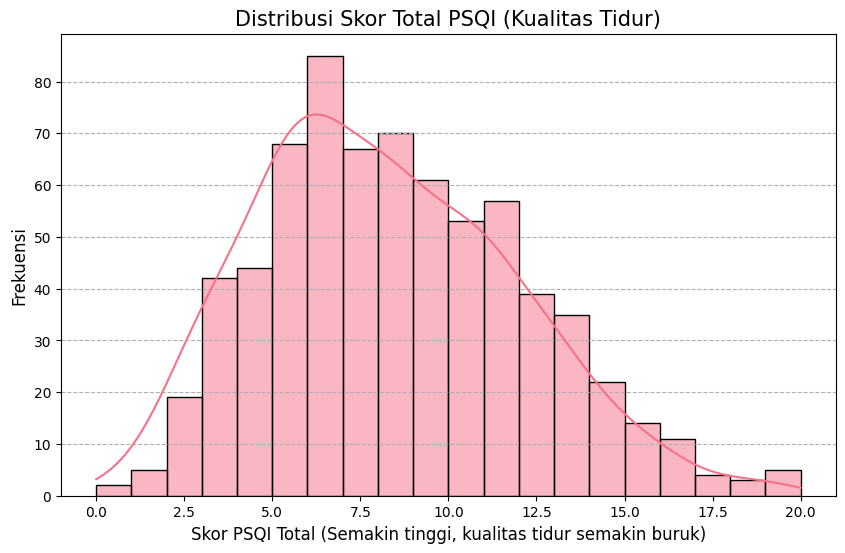


Deskripsi Skor Total PSQI:
count    706.000000
mean       8.165722
std        3.676571
min        0.000000
25%        5.000000
50%        8.000000
75%       11.000000
max       20.000000
Name: PSQI_Total, dtype: float64


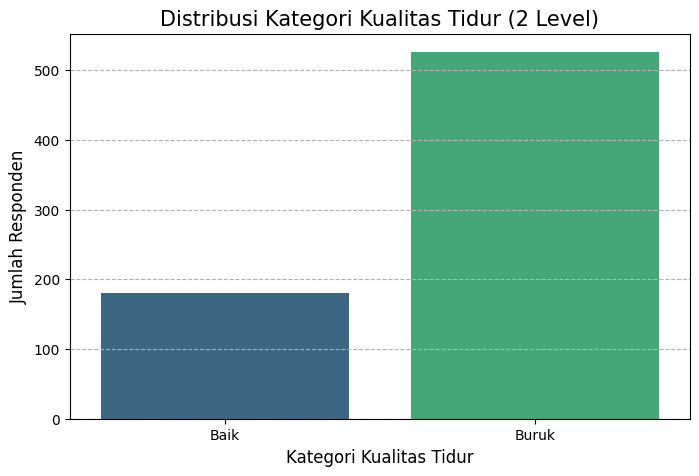


Persentase Kategori Kualitas Tidur (2 Level):
Sleep_Quality_Category_2Lvl
Buruk    74.5
Baik     25.5
Name: proportion, dtype: float64


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl") # Global palette

df_processed = pd.read_csv('/kaggle/input/cleaned1/dataset_final_processed.csv')

print("MEMULAI FASE 2: ANALISIS DATA EKSPLORATIF (EDA) MENDALAM")

# Baik if PSQI_Total <= 5, Buruk if PSQI_Total > 5
df_processed['Sleep_Quality_Category_2Lvl'] = np.where(df_processed['PSQI_Total'] <= 5, 'Baik', 'Buruk')
print("\nDistribusi Kategori Kualitas Tidur (2 Level) baru dibuat:")
print(df_processed['Sleep_Quality_Category_2Lvl'].value_counts(normalize=True).mul(100).round(2))
print("-" * 50)

# Review Distribusi Variabel Kunci (Lebih Detail)
print("\n1. Distribusi Variabel Kunci")

# Skor Total PSQI
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['PSQI_Total'], kde=True, color=sns.color_palette("husl")[0], bins=20)
plt.title('Distribusi Skor Total PSQI (Kualitas Tidur)', fontsize=15)
plt.xlabel('Skor PSQI Total (Semakin tinggi, kualitas tidur semakin buruk)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()
print("\nDeskripsi Skor Total PSQI:")
print(df_processed['PSQI_Total'].describe())

# Kategori Kualitas Tidur (2 Level) - MODIFIED
plt.figure(figsize=(8, 5))
sns.countplot(data=df_processed, x='Sleep_Quality_Category_2Lvl', order=['Baik', 'Buruk'], palette="viridis") # Palette adjusted
plt.title('Distribusi Kategori Kualitas Tidur (2 Level)', fontsize=15)
plt.xlabel('Kategori Kualitas Tidur', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()
print("\nPersentase Kategori Kualitas Tidur (2 Level):")
print(df_processed['Sleep_Quality_Category_2Lvl'].value_counts(normalize=True).mul(100).round(2))


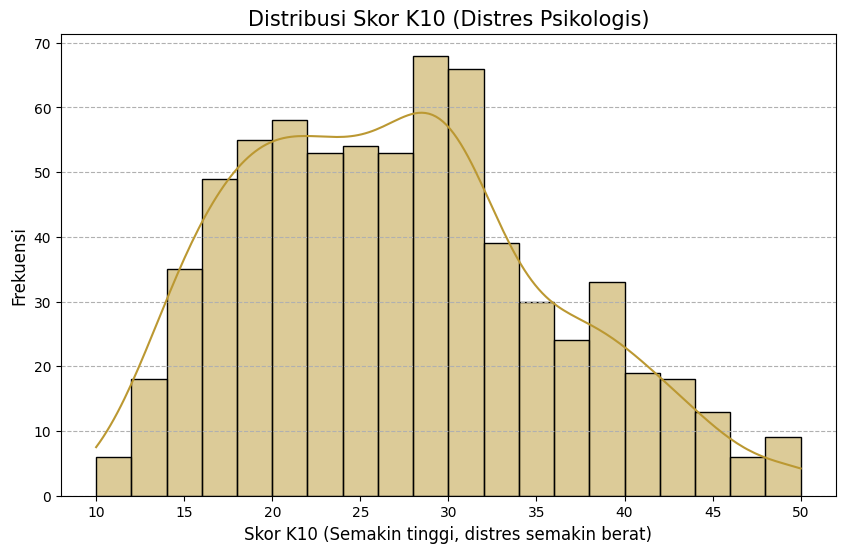


Deskripsi Skor K10:
count    706.000000
mean      26.869688
std        8.700209
min       10.000000
25%       20.000000
50%       26.000000
75%       32.000000
max       50.000000
Name: K10_Score, dtype: float64


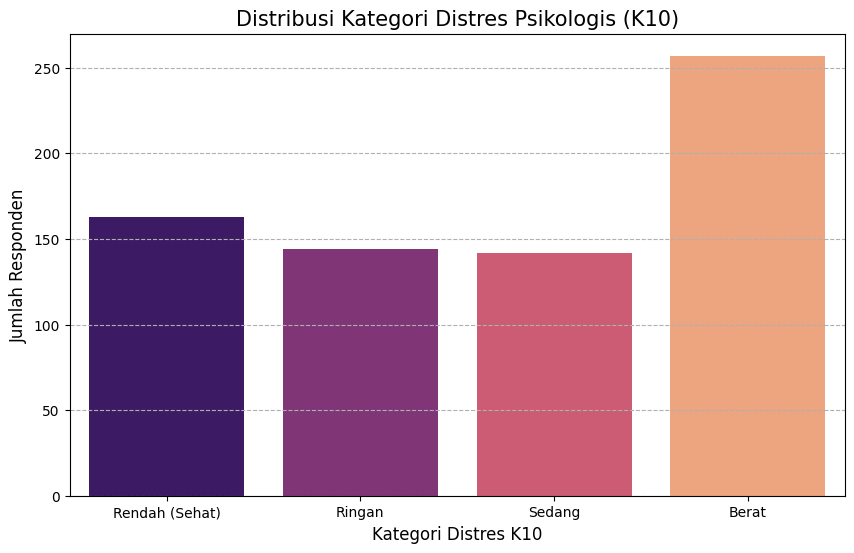


Persentase Kategori Distres Psikologis (K10):
K10_Category
Berat             36.40
Rendah (Sehat)    23.09
Ringan            20.40
Sedang            20.11
Name: proportion, dtype: float64


In [19]:
# Skor K10 (Distres Psikologis)
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['K10_Score'], kde=True, color=sns.color_palette("husl")[1], bins=20)
plt.title('Distribusi Skor K10 (Distres Psikologis)', fontsize=15)
plt.xlabel('Skor K10 (Semakin tinggi, distres semakin berat)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()
print("\nDeskripsi Skor K10:")
print(df_processed['K10_Score'].describe())

# Kategori Skor K10
plt.figure(figsize=(10, 6))
sns.countplot(data=df_processed, x='K10_Category', order=['Rendah (Sehat)', 'Ringan', 'Sedang', 'Berat'], palette="magma")
plt.title('Distribusi Kategori Distres Psikologis (K10)', fontsize=15)
plt.xlabel('Kategori Distres K10', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()
print("\nPersentase Kategori Distres Psikologis (K10):")
print(df_processed['K10_Category'].value_counts(normalize=True).mul(100).round(2))

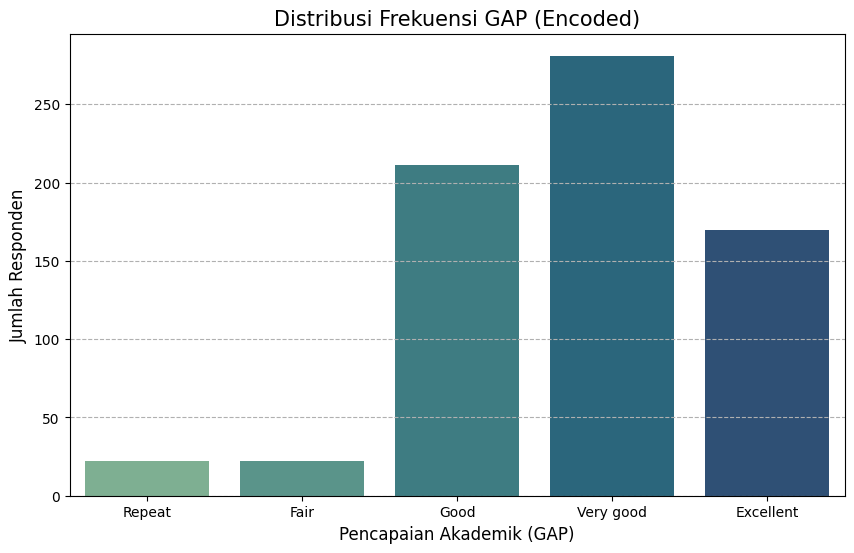


Persentase Frekuensi GAP (Encoded):
GAP_Encoded
0     3.12
1     3.12
2    29.89
3    39.80
4    24.08
Name: proportion, dtype: float64


In [20]:
# GAP Encoded
gap_labels_map = {0: 'Repeat', 1: 'Fair', 2: 'Good', 3: 'Very good', 4: 'Excellent'}
# Ensure unique values are sorted before applying map for labels, if they aren't already 0,1,2,3,4
unique_gap_values = sorted(df_processed['GAP_Encoded'].unique())
gap_ordered_labels = [gap_labels_map[i] for i in unique_gap_values if i in gap_labels_map]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_processed, x='GAP_Encoded', order=unique_gap_values, palette="crest")
plt.title('Distribusi Frekuensi GAP (Encoded)', fontsize=15)
plt.xlabel('Pencapaian Akademik (GAP)', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.xticks(ticks=unique_gap_values, labels=gap_ordered_labels)
plt.grid(axis='y', linestyle='--')
plt.show()
print("\nPersentase Frekuensi GAP (Encoded):")
print(df_processed['GAP_Encoded'].value_counts(normalize=True).mul(100).sort_index().round(2))


2. Analisis Hubungan Inti (Kualitas Tidur, Distres Psikologis, Pencapaian Akademik)


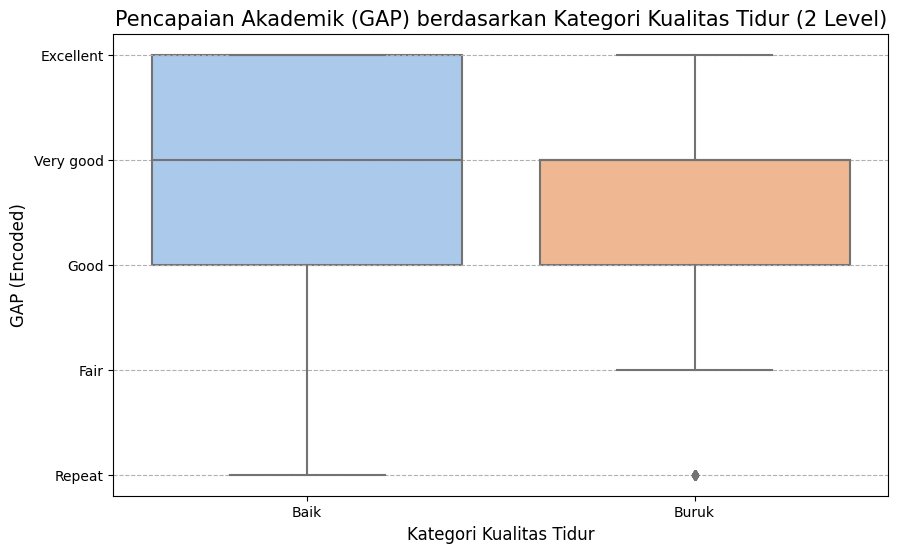

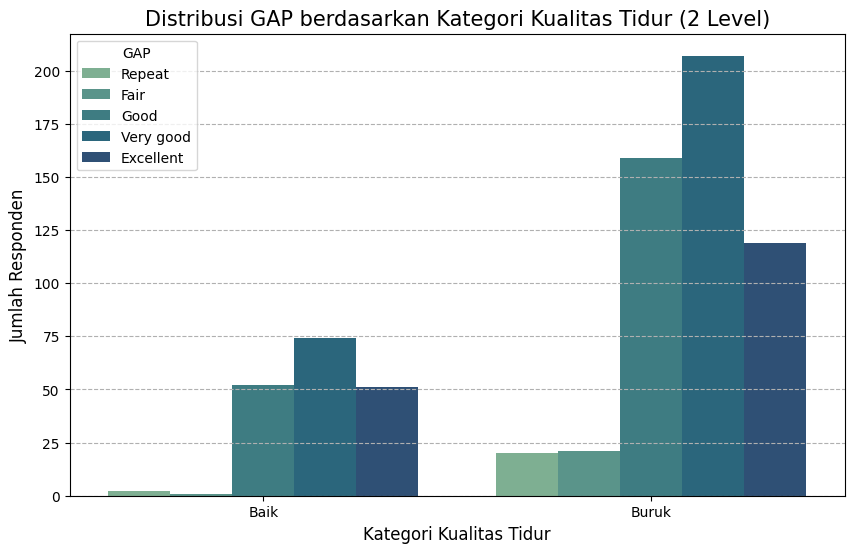

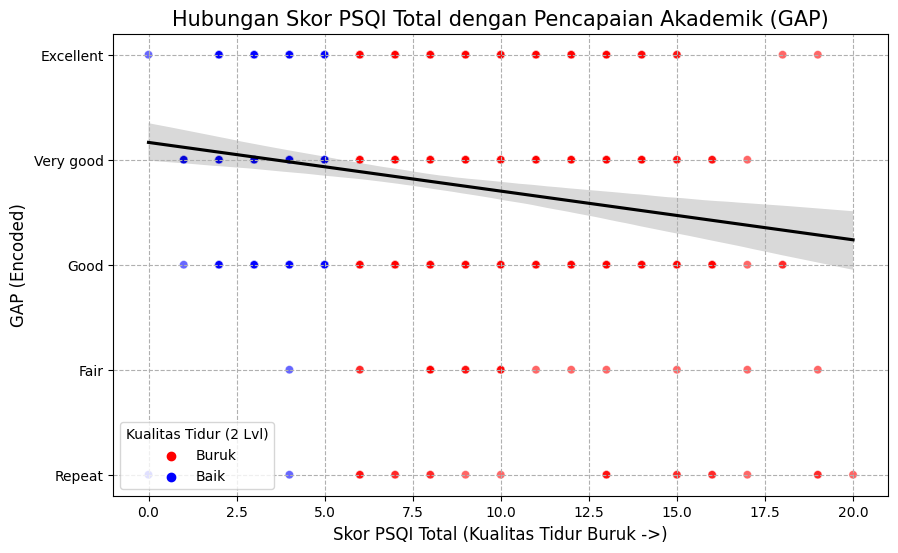

In [22]:
#  Analisis Hubungan Inti (Tidur, Stres, GAP)
print("\n2. Analisis Hubungan Inti (Kualitas Tidur, Distres Psikologis, Pencapaian Akademik)")

# GAP vs Kualitas Tidur (2 Level) - MODIFIED
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_processed, x='Sleep_Quality_Category_2Lvl', y='GAP_Encoded', order=['Baik', 'Buruk'], palette="pastel")
plt.title('Pencapaian Akademik (GAP) berdasarkan Kategori Kualitas Tidur (2 Level)', fontsize=15)
plt.xlabel('Kategori Kualitas Tidur', fontsize=12)
plt.ylabel('GAP (Encoded)', fontsize=12)
plt.yticks(ticks=unique_gap_values, labels=gap_ordered_labels)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df_processed, x='Sleep_Quality_Category_2Lvl', hue='GAP_Encoded', order=['Baik', 'Buruk'], hue_order=unique_gap_values, palette="crest")
plt.title('Distribusi GAP berdasarkan Kategori Kualitas Tidur (2 Level)', fontsize=15)
plt.xlabel('Kategori Kualitas Tidur', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.legend(title='GAP', labels=gap_ordered_labels)
plt.grid(axis='y', linestyle='--')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_processed, x='PSQI_Total', y='GAP_Encoded', alpha=0.6, hue='Sleep_Quality_Category_2Lvl', palette={'Baik':'blue', 'Buruk':'red'})
sns.regplot(data=df_processed, x='PSQI_Total', y='GAP_Encoded', scatter=False, color='black') # Overall regression line
plt.title('Hubungan Skor PSQI Total dengan Pencapaian Akademik (GAP)', fontsize=15)
plt.xlabel('Skor PSQI Total (Kualitas Tidur Buruk ->)', fontsize=12)
plt.ylabel('GAP (Encoded)', fontsize=12)
plt.yticks(ticks=unique_gap_values, labels=gap_ordered_labels)
plt.grid(True, linestyle='--')
plt.legend(title='Kualitas Tidur (2 Lvl)')
plt.show()

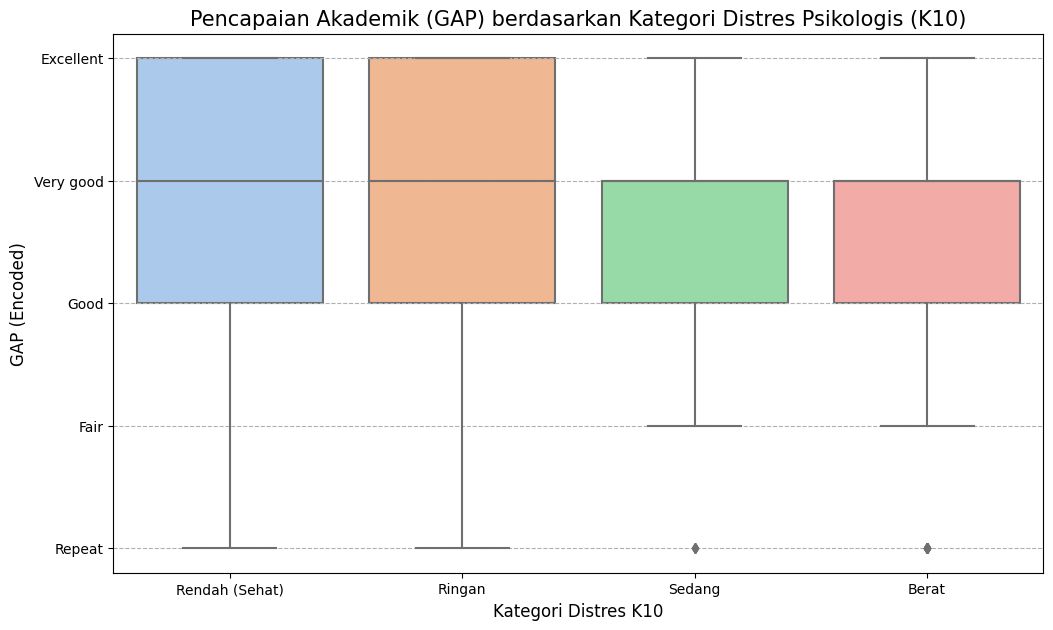

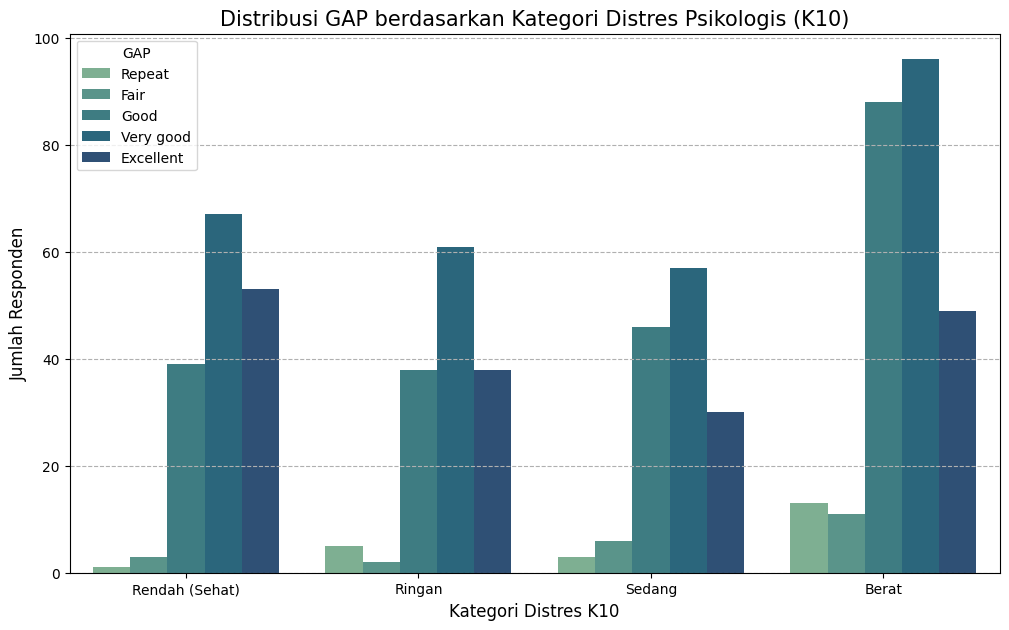

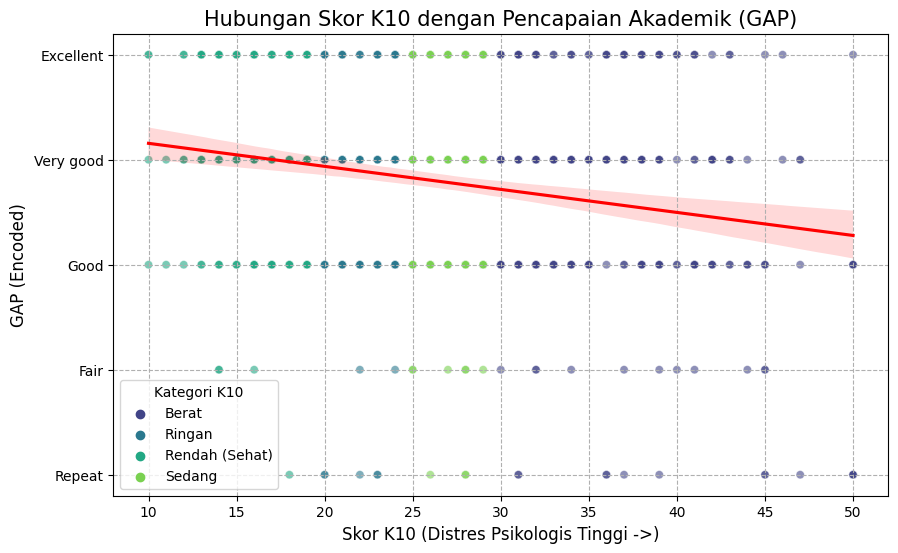

In [24]:

# GAP vs Tingkat Distres Psikologis
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_processed, x='K10_Category', y='GAP_Encoded', order=['Rendah (Sehat)', 'Ringan', 'Sedang', 'Berat'], palette="pastel")
plt.title('Pencapaian Akademik (GAP) berdasarkan Kategori Distres Psikologis (K10)', fontsize=15)
plt.xlabel('Kategori Distres K10', fontsize=12)
plt.ylabel('GAP (Encoded)', fontsize=12)
plt.yticks(ticks=unique_gap_values, labels=gap_ordered_labels)
plt.grid(axis='y', linestyle='--')
plt.show()


plt.figure(figsize=(12, 7))
sns.countplot(data=df_processed, x='K10_Category', hue='GAP_Encoded', order=['Rendah (Sehat)', 'Ringan', 'Sedang', 'Berat'], hue_order=unique_gap_values, palette="crest")
plt.title('Distribusi GAP berdasarkan Kategori Distres Psikologis (K10)', fontsize=15)
plt.xlabel('Kategori Distres K10', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.legend(title='GAP', labels=gap_ordered_labels)
plt.grid(axis='y', linestyle='--')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_processed, x='K10_Score', y='GAP_Encoded', alpha=0.6, hue='K10_Category', palette='viridis')
sns.regplot(data=df_processed, x='K10_Score', y='GAP_Encoded', scatter=False, color='red')
plt.title('Hubungan Skor K10 dengan Pencapaian Akademik (GAP)', fontsize=15)
plt.xlabel('Skor K10 (Distres Psikologis Tinggi ->)', fontsize=12)
plt.ylabel('GAP (Encoded)', fontsize=12)
plt.yticks(ticks=unique_gap_values, labels=gap_ordered_labels)
plt.grid(True, linestyle='--')
plt.legend(title='Kategori K10')
plt.show()

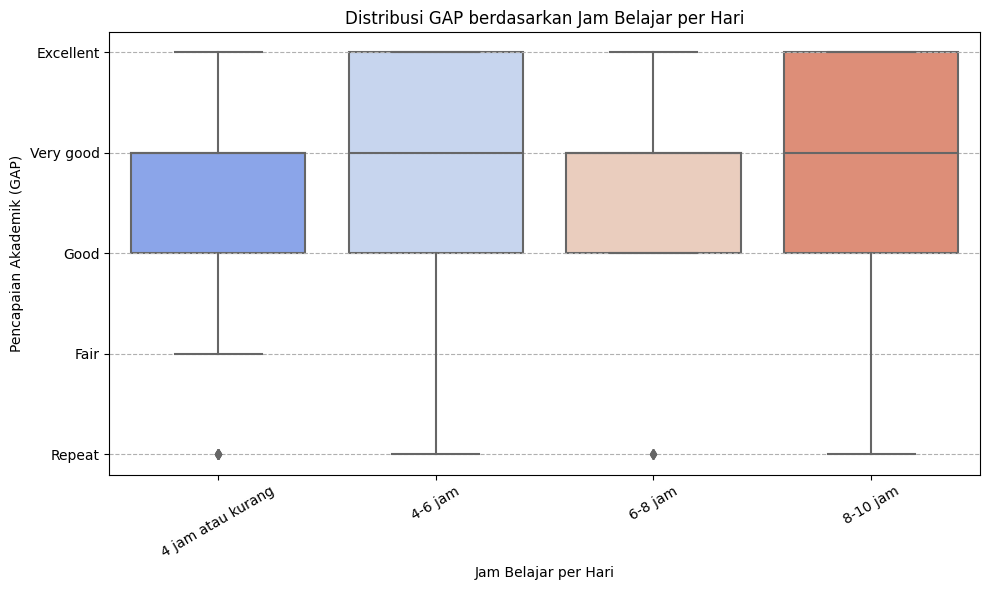

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('dataset_final_processed.csv')

gap_labels = {0: 'Repeat', 1: 'Fair', 2: 'Good', 3: 'Very good', 4: 'Excellent'}
study_hours_labels = {2: '4 jam atau kurang', 5: '4-6 jam', 7: '6-8 jam', 9: '8-10 jam'}

x_order = sorted(df['Study_Hours_Day_Encoded'].unique())
x_labels = [study_hours_labels.get(x, x) for x in x_order]

y_order = sorted(df['GAP_Encoded'].unique())
y_labels = [gap_labels.get(y, y) for y in y_order]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Study_Hours_Day_Encoded',
    y='GAP_Encoded',
    order=x_order,
    palette="coolwarm"
)
plt.title('Distribusi GAP berdasarkan Jam Belajar per Hari')
plt.xlabel('Jam Belajar per Hari')
plt.ylabel('Pencapaian Akademik (GAP)')
plt.xticks(ticks=range(len(x_order)), labels=x_labels, rotation=30)
plt.yticks(ticks=y_order, labels=y_labels)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


Semua kelompok jam belajar punya sebaran pencapaian yang luas (mulai dari "Repeat" sampai "Excellent")  artinya jam belajar per hari saja tidak otomatis menjamin hasil GAP yang tinggi!

Belajar lebih lama ≠ hasil akademik selalu lebih baik!
Yang penting bukan cuma kuantitas jam belajar, tapi juga kualitas, strategi, dan keseimbangan hidup!

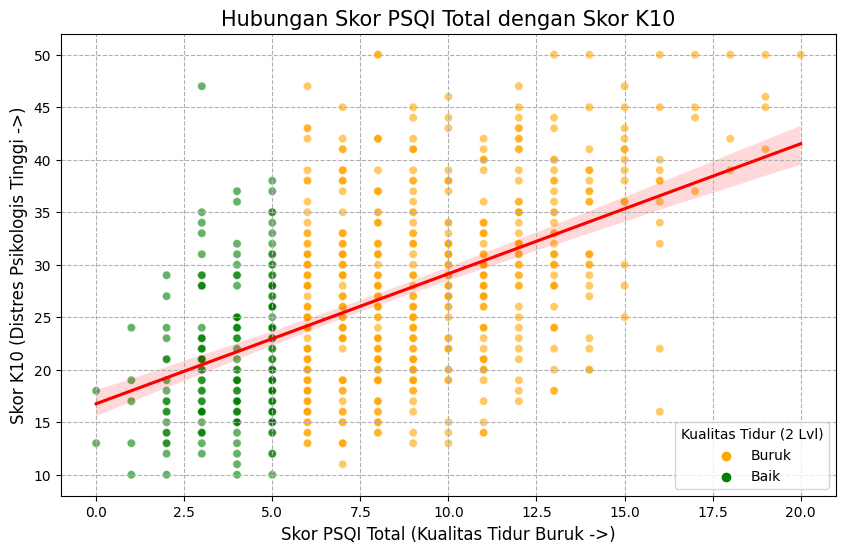


4. Matriks Korelasi Spearman


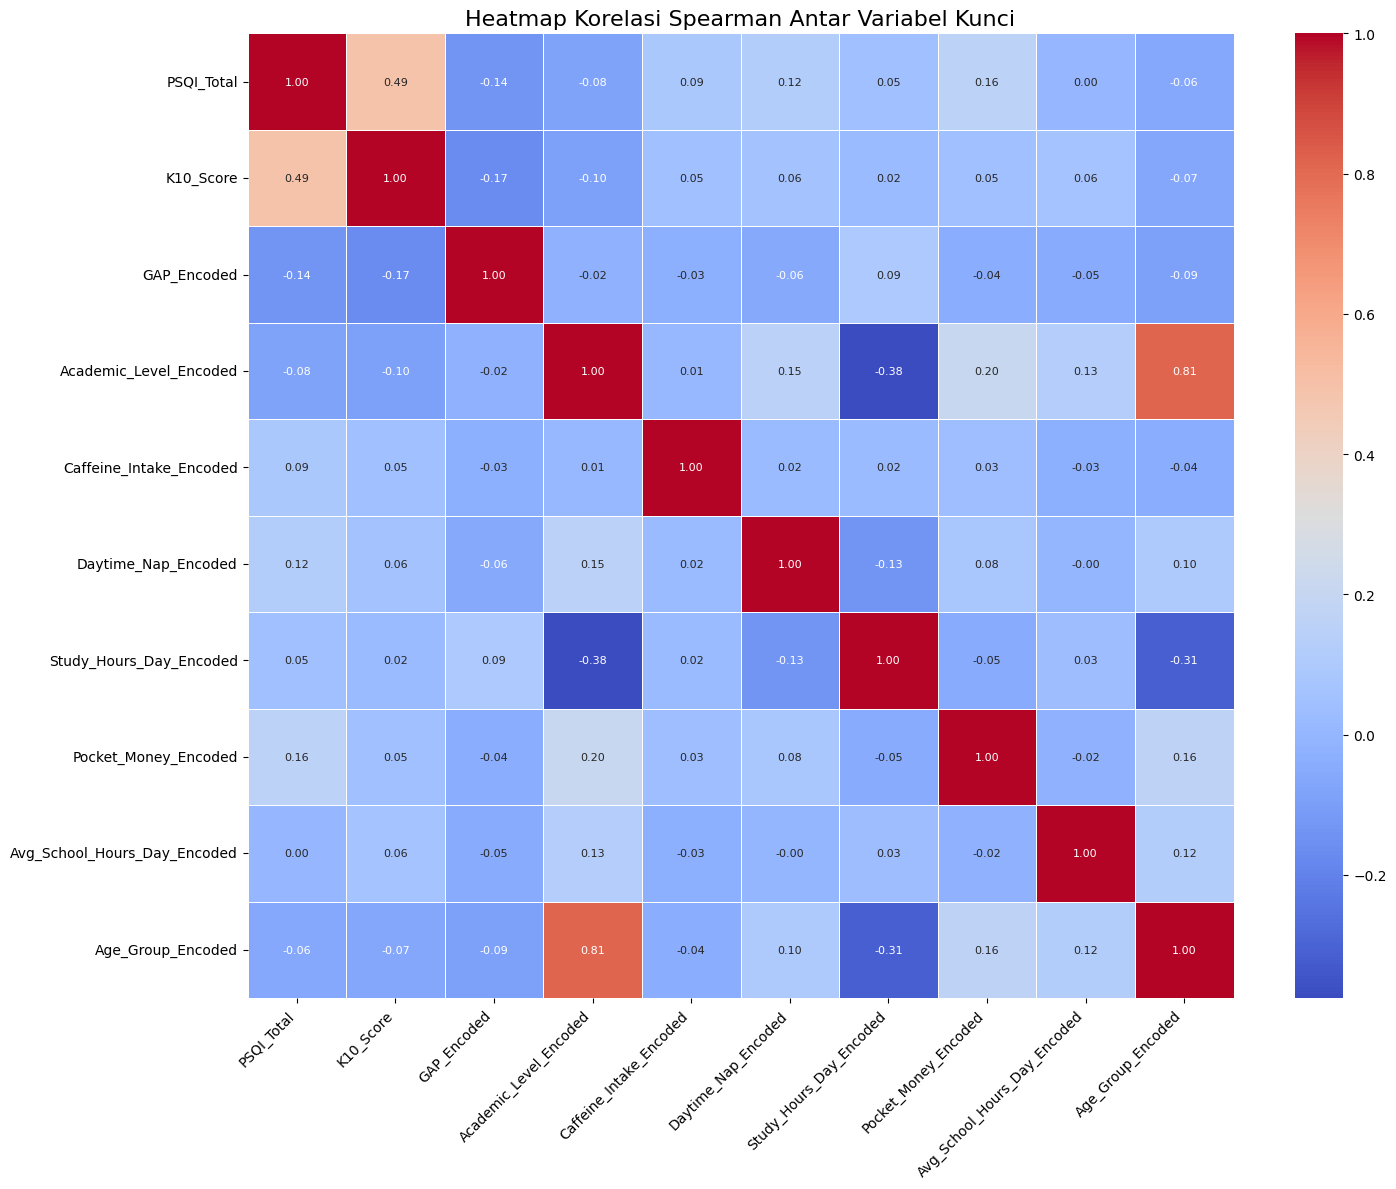


5. Visualisasi Interaksi (Contoh)


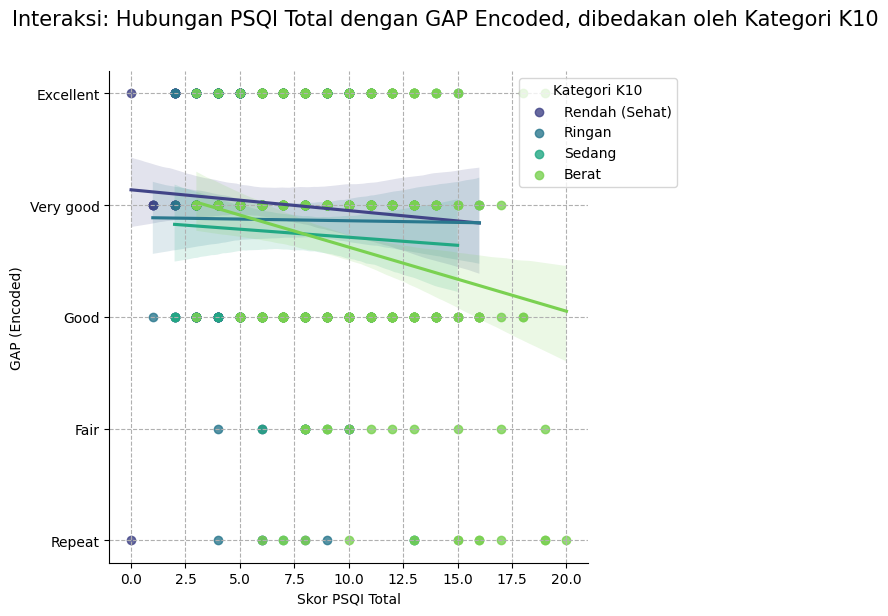

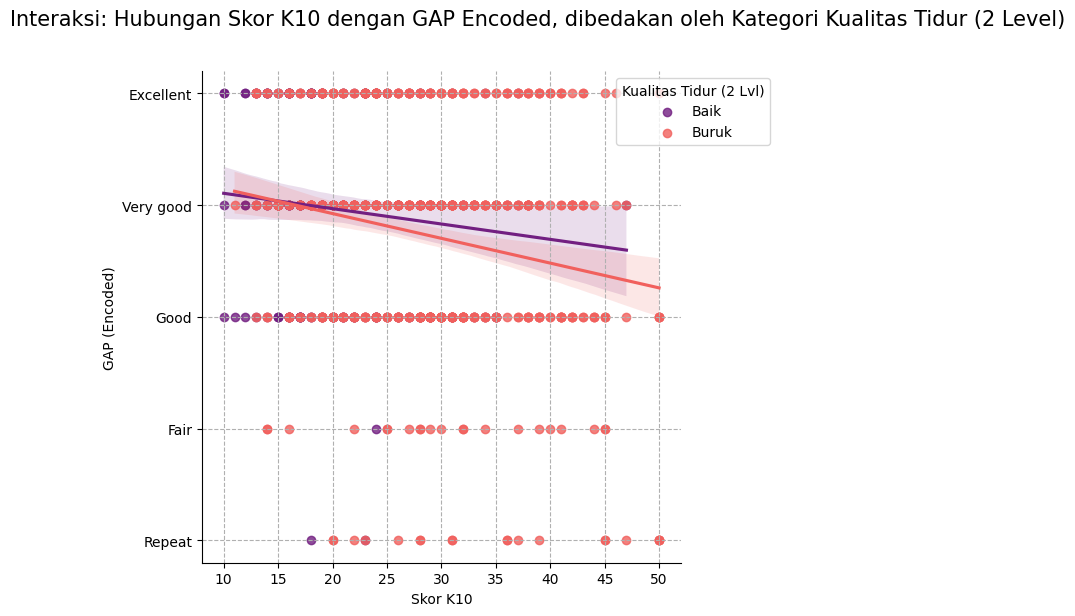


FASE 2 (EDA MENDALAM) SELESAI.


In [27]:

# Kualitas Tidur (PSQI_Total) vs Distres Psikologis (K10_Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_processed, x='PSQI_Total', y='K10_Score', alpha=0.6, hue='Sleep_Quality_Category_2Lvl', palette={'Baik':'green', 'Buruk':'orange'})
sns.regplot(data=df_processed, x='PSQI_Total', y='K10_Score', scatter=False, color='red')
plt.title('Hubungan Skor PSQI Total dengan Skor K10', fontsize=15)
plt.xlabel('Skor PSQI Total (Kualitas Tidur Buruk ->)', fontsize=12)
plt.ylabel('Skor K10 (Distres Psikologis Tinggi ->)', fontsize=12)
plt.grid(True, linestyle='--')
plt.legend(title='Kualitas Tidur (2 Lvl)')
plt.show()


# Matriks Korelasi Mendalam
print("\n4. Matriks Korelasi Spearman")
numerical_ordinal_cols_for_corr = ['PSQI_Total', 'K10_Score', 'GAP_Encoded',
                                   'Academic_Level_Encoded', 'Caffeine_Intake_Encoded',
                                   'Daytime_Nap_Encoded', 'Study_Hours_Day_Encoded',
                                   'Pocket_Money_Encoded', 'Avg_School_Hours_Day_Encoded',
                                   'Age_Group_Encoded']
# Filter kolom yang benar-benar ada di df_processed dan bertipe numerik
valid_cols_for_corr = [col for col in numerical_ordinal_cols_for_corr if col in df_processed.columns and pd.api.types.is_numeric_dtype(df_processed[col])]

if valid_cols_for_corr:
    plt.figure(figsize=(15, 12))
    correlation_matrix = df_processed[valid_cols_for_corr].corr(method='spearman')
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title('Heatmap Korelasi Spearman Antar Variabel Kunci', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ditemukan kolom numerik/ordinal yang valid untuk membuat matriks korelasi.")


# Visualisasi Interaksi (Contoh)
print("\n5. Visualisasi Interaksi (Contoh)")

# Melihat hubungan PSQI_Total dengan GAP_Encoded, dibedakan berdasarkan K10_Category
plot_psqi_gap_k10 = sns.lmplot(data=df_processed, x='PSQI_Total', y='GAP_Encoded', hue='K10_Category',
                               hue_order=['Rendah (Sehat)', 'Ringan', 'Sedang', 'Berat'],
                               palette='viridis', height=6, aspect=1.5, legend=False) # legend=False to customize later
plot_psqi_gap_k10.set_axis_labels('Skor PSQI Total', 'GAP (Encoded)')
plt.suptitle('Interaksi: Hubungan PSQI Total dengan GAP Encoded, dibedakan oleh Kategori K10', y=1.02, fontsize=15) # suptitle for lmplot
# Untuk menyesuaikan yticks pada FacetGrid (hasil dari lmplot), kita perlu iterate melalui axes
for ax in plot_psqi_gap_k10.axes.flat:
    ax.set_yticks(unique_gap_values)
    ax.set_yticklabels(gap_ordered_labels)
    ax.grid(True, linestyle='--')
plt.legend(title='Kategori K10', loc='upper right', bbox_to_anchor=(1.2, 1)) # Custom legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()


# Melihat hubungan K10_Score dengan GAP_Encoded, dibedakan berdasarkan Sleep_Quality_Category_2Lvl - MODIFIED
plot_k10_gap_sleep = sns.lmplot(data=df_processed, x='K10_Score', y='GAP_Encoded', hue='Sleep_Quality_Category_2Lvl',
                                hue_order=['Baik', 'Buruk'], # MODIFIED order
                                palette='magma', height=6, aspect=1.5, legend=False)
plot_k10_gap_sleep.set_axis_labels('Skor K10', 'GAP (Encoded)')
plt.suptitle('Interaksi: Hubungan Skor K10 dengan GAP Encoded, dibedakan oleh Kategori Kualitas Tidur (2 Level)', y=1.02, fontsize=15) # MODIFIED title
for ax in plot_k10_gap_sleep.axes.flat:
    ax.set_yticks(unique_gap_values)
    ax.set_yticklabels(gap_ordered_labels)
    ax.grid(True, linestyle='--')
plt.legend(title='Kualitas Tidur (2 Lvl)', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


print("\nFASE 2 (EDA MENDALAM) SELESAI.")

## Insight Penting dari EDA

### 1. Distribusi Variabel Kunci
- **PSQI_Total**: Sebagian besar responden memiliki skor tinggi, menandakan kualitas tidur yang buruk umum terjadi.
- **K10_Score**: Rata-rata skor berada pada 26–27, menunjukkan banyak mahasiswa mengalami distres psikologis tingkat sedang.
- **GAP_Encoded**: Mayoritas mahasiswa berada pada kategori "Good" ke atas. Kelompok dengan performa rendah tetap ada, menciptakan variasi yang baik untuk analisis.

### 2. Hubungan Antar Variabel
- **Kualitas Tidur vs GAP**: Mahasiswa dengan tidur yang baik cenderung memiliki GAP lebih tinggi. Terdapat tren negatif antara PSQI_Total dan GAP.
- **Distres Psikologis vs GAP**: GAP menurun seiring meningkatnya kategori distres K10. Distres tinggi berkorelasi dengan performa akademik lebih rendah.
- **Tidur vs Distres**: PSQI_Total dan K10_Score kemungkinan berkorelasi positif, artinya tidur buruk berkaitan dengan distres tinggi.

### 3. Korelasi Variabel
- Korelasi negatif antara PSQI_Total dan GAP_Encoded.
- Korelasi negatif antara K10_Score dan GAP_Encoded.
- Korelasi positif antara PSQI_Total dan K10_Score.

### 4. Rangkuman
- Kualitas tidur buruk dan distres cukup umum di kalangan mahasiswa.
- Keduanya menunjukkan hubungan negatif terhadap performa akademik.
- Hubungan antara tidur dan distres juga tampak saling terkait.
- Faktor gaya hidup bisa berpengaruh dan perlu diuji lebih lanjut.


# FASE 3: Statisical Analysis

In [30]:
from scipy.stats import mannwhitneyu, kruskal
import scikit_posthocs as sp # Untuk uji post-hoc jika Kruskal-Wallis signifikan
import pandas as pd 

print("\n2. Menguji Perbedaan Signifikan Antar Kelompok")

# a. GAP_Encoded berdasarkan Kualitas Tidur (Sleep_Quality_Category_2Lvl: Baik vs Buruk)
print("\na. GAP berdasarkan Kualitas Tidur (2 Level: Baik vs Buruk)")
if 'Sleep_Quality_Category_2Lvl' in df_processed.columns:
    gap_baik = df_processed[df_processed['Sleep_Quality_Category_2Lvl'] == 'Baik']['GAP_Encoded'].dropna()
    gap_buruk = df_processed[df_processed['Sleep_Quality_Category_2Lvl'] == 'Buruk']['GAP_Encoded'].dropna()

    if not gap_baik.empty and not gap_buruk.empty:
        stat_mw_sleep, p_value_mw_sleep = mannwhitneyu(gap_baik, gap_buruk, alternative='two-sided')
        print(f"   Mann-Whitney U test: Statistic={stat_mw_sleep:.3f}, P-value={p_value_mw_sleep:.4f}")
        if p_value_mw_sleep < 0.05:
            print("   Kesimpulan: Terdapat perbedaan signifikan pada GAP antara kualitas tidur Baik dan Buruk.")
            # Anda bisa menambahkan perbandingan median jika signifikan
            print(f"   Median GAP Kualitas Tidur Baik: {gap_baik.median()}")
            print(f"   Median GAP Kualitas Tidur Buruk: {gap_buruk.median()}")
        else:
            print("   Kesimpulan: Tidak terdapat perbedaan signifikan pada GAP antara kualitas tidur Baik dan Buruk.")
    else:
        print("   Peringatan: Tidak cukup data pada salah satu atau kedua kelompok kualitas tidur (2 Level) untuk Mann-Whitney U test.")
else:
    print("   Peringatan: Kolom 'Sleep_Quality_Category_2Lvl' tidak ditemukan.")

# b. GAP_Encoded berdasarkan Kategori Distres Psikologis (K10_Category)
print("\nb. GAP berdasarkan Kategori Distres Psikologis (K10)")
k10_categories_order = ['Rendah (Sehat)', 'Ringan', 'Sedang', 'Berat']
groups_k10_gap = []
for cat in k10_categories_order:
    group_data = df_processed['GAP_Encoded'][df_processed['K10_Category'] == cat].dropna()
    if not group_data.empty:
        groups_k10_gap.append(group_data)

if len(groups_k10_gap) > 1: # Perlu minimal 2 grup untuk dibandingkan
    stat_kw_k10_gap, p_value_kw_k10_gap = kruskal(*groups_k10_gap)
    print(f"   Kruskal-Wallis test: Statistic={stat_kw_k10_gap:.3f}, P-value={p_value_kw_k10_gap:.4f}")
    if p_value_kw_k10_gap < 0.05:
        print("   Kesimpulan: Terdapat perbedaan signifikan pada GAP antar kategori K10.")
        # Uji Post-hoc Dunn untuk melihat pasangan mana yang berbeda
        try:
            posthoc_dunn_k10_gap = sp.posthoc_dunn(df_processed, val_col='GAP_Encoded', group_col='K10_Category', p_adjust='bonferroni')
            print("\n   Uji Post-hoc Dunn (Bonferroni) untuk GAP vs K10_Category:")
            display(posthoc_dunn_k10_gap)
        except Exception as e:
            print(f"   Gagal melakukan uji post-hoc: {e}")
    else:
        print("   Kesimpulan: Tidak terdapat perbedaan signifikan pada GAP antar kategori K10.")
else:
    print("   Peringatan: Tidak cukup grup K10 dengan data untuk Kruskal-Wallis test.")


print("\nc. Kualitas Tidur (PSQI_Total) berdasarkan Konsumsi Kafein")
caffeine_categories_order = sorted(df_processed['Caffeine_Intake_Encoded'].unique())
groups_caffeine_psqi = []
for cat_val in caffeine_categories_order:
    group_data = df_processed['PSQI_Total'][df_processed['Caffeine_Intake_Encoded'] == cat_val].dropna()
    if not group_data.empty:
        groups_caffeine_psqi.append(group_data)




2. Menguji Perbedaan Signifikan Antar Kelompok

a. GAP berdasarkan Kualitas Tidur (2 Level: Baik vs Buruk)
   Mann-Whitney U test: Statistic=52567.000, P-value=0.0194
   Kesimpulan: Terdapat perbedaan signifikan pada GAP antara kualitas tidur Baik dan Buruk.
   Median GAP Kualitas Tidur Baik: 3.0
   Median GAP Kualitas Tidur Buruk: 3.0

b. GAP berdasarkan Kategori Distres Psikologis (K10)
   Kruskal-Wallis test: Statistic=19.871, P-value=0.0002
   Kesimpulan: Terdapat perbedaan signifikan pada GAP antar kategori K10.

   Uji Post-hoc Dunn (Bonferroni) untuk GAP vs K10_Category:


,Berat,Rendah (Sehat),Ringan,Sedang
Berat,1.000000,0.000145,0.054698,1.000000
Rendah (Sehat),0.000145,1.000000,1.000000,0.035897
Ringan,0.054698,1.000000,1.000000,0.990808
Sedang,1.000000,0.035897,0.990808,1.000000



c. Kualitas Tidur (PSQI_Total) berdasarkan Konsumsi Kafein
   Kruskal-Wallis test: Statistic=7.290, P-value=0.1213
   Kesimpulan: Tidak terdapat perbedaan signifikan pada PSQI_Total antar kategori konsumsi kafein.


In [36]:
from scipy.stats import ttest_ind, f_oneway
import pandas as pd
import scikit_posthocs as sp # Untuk post-hoc ANOVA jika signifikan

print("FASE 3: UJI BEDA (Fokus pada Mean dan Variabel Pilihan)")

# Fungsi bantuan untuk t-test independen (2 grup)
def perform_ttest(df, group_col, value_col, group1_name, group2_name):
    print(f"\nMembandingkan mean '{value_col}' antara '{group1_name}' dan '{group2_name}' (dari kolom '{group_col}')")
    
    if group_col not in df.columns or value_col not in df.columns:
        print(f"  Peringatan: Kolom '{group_col}' atau '{value_col}' tidak ditemukan.")
        return

    group1_data = df[value_col][df[group_col] == group1_name].dropna()
    group2_data = df[value_col][df[group_col] == group2_name].dropna()

    if not group1_data.empty and not group2_data.empty:
        # Asumsi varians tidak sama (Welch's t-test) lebih aman
        stat, p_value = ttest_ind(group1_data, group2_data, equal_var=False) 
        print(f"  T-test independen: Statistic={stat:.3f}, P-value={p_value:.4f}")
        if p_value < 0.05:
            print(f"  Kesimpulan: Terdapat perbedaan mean '{value_col}' yang signifikan secara statistik.")
            print(f"  Mean '{value_col}' untuk '{group1_name}': {group1_data.mean():.2f}")
            print(f"  Mean '{value_col}' untuk '{group2_name}': {group2_data.mean():.2f}")
        else:
            print(f"  Kesimpulan: Tidak terdapat perbedaan mean '{value_col}' yang signifikan secara statistik.")
    else:
        print(f"  Peringatan: Tidak cukup data pada salah satu atau kedua grup untuk t-test.")

# Fungsi bantuan untuk ANOVA one-way (>2 grup)
def perform_anova(df, group_col, value_col, group_order=None):
    print(f"\nMembandingkan mean '{value_col}' antar kategori di '{group_col}'")

    if group_col not in df.columns or value_col not in df.columns:
        print(f"  Peringatan: Kolom '{group_col}' atau '{value_col}' tidak ditemukan.")
        return

    data_to_test = df[[group_col, value_col]].dropna()
    if data_to_test.empty:
        print(f"  Peringatan: Tidak ada data setelah menghapus NaN.")
        return
        
    unique_group_values = data_to_test[group_col].unique()
    if len(unique_group_values) < 2:
        print(f"  Peringatan: Hanya ditemukan {len(unique_group_values)} grup unik di '{group_col}'. ANOVA tidak dapat dilakukan.")
        return

    groups_for_anova = []
    ordered_group_names = group_order if group_order else sorted(unique_group_values)

    for category in ordered_group_names:
        group_data = data_to_test[value_col][data_to_test[group_col] == category]
        if not group_data.empty:
            groups_for_anova.append(group_data)
            print(f"  Mean '{value_col}' untuk kategori '{category}': {group_data.mean():.2f} (n={len(group_data)})")
        else:
            print(f"  Peringatan: Tidak ada data untuk kategori '{category}' di kolom '{group_col}'.")


    if len(groups_for_anova) > 1: # Perlu minimal 2 grup dengan data
        stat, p_value = f_oneway(*groups_for_anova)
        print(f"  ANOVA one-way: F-Statistic={stat:.3f}, P-value={p_value:.4f}")
        if p_value < 0.05:
            print(f"  Kesimpulan: Terdapat perbedaan mean '{value_col}' yang signifikan secara statistik antar kategori '{group_col}'.")
            # Uji Post-hoc Tukey HSD jika ANOVA signifikan (lebih cocok untuk ANOVA daripada Dunn)
            # Untuk Tukey, statsmodels bisa digunakan, atau scikit-posthocs juga punya opsi lain
            # Contoh dengan Tukey HSD dari statsmodels (membutuhkan struktur data sedikit berbeda)
            # Atau gunakan posthoc_tukey dari scikit_posthocs jika tersedia dan cocok
            try:
                # Pastikan kolom group_col dan value_col ada di data_to_test
                # scikit-posthocs.posthoc_tukey lebih mudah untuk ini
                posthoc_tukey_result = sp.posthoc_tukey(data_to_test, val_col=value_col, group_col=group_col)
                print(f"\n  Uji Post-hoc Tukey HSD untuk {value_col} vs {group_col}:")
                display(posthoc_tukey_result)
            except Exception as e:
                print(f"  Gagal melakukan uji post-hoc Tukey: {e}. Pertimbangkan uji post-hoc lain atau periksa data grup.")
        else:
            print(f"  Kesimpulan: Tidak terdapat perbedaan mean '{value_col}' yang signifikan secara statistik antar kategori '{group_col}'.")
    else:
        print(f"  Peringatan: Tidak cukup grup dengan data untuk ANOVA.")



FASE 3: UJI BEDA (Fokus pada Mean dan Variabel Pilihan)


In [33]:
# --- Melakukan Uji Beda ---

# 1. Kualitas Tidur (2 kategori: Sleep_Quality_Category_2Lvl) vs. GAP_Encoded
if 'Sleep_Quality_Category_2Lvl' in df_processed.columns:
    perform_ttest(df_processed, 'Sleep_Quality_Category_2Lvl', 'GAP_Encoded', 'Baik', 'Buruk')
else:
    print("Peringatan: Kolom 'Sleep_Quality_Category_2Lvl' tidak ditemukan untuk Uji 1.")



Membandingkan mean 'GAP_Encoded' antara 'Baik' dan 'Buruk' (dari kolom 'Sleep_Quality_Category_2Lvl')
  T-test independen: Statistic=2.916, P-value=0.0038
  Kesimpulan: Terdapat perbedaan mean 'GAP_Encoded' yang signifikan secara statistik.
  Mean 'GAP_Encoded' untuk 'Baik': 2.95
  Mean 'GAP_Encoded' untuk 'Buruk': 2.73


In [34]:
# 2. Kategori Distres (K10_Category) vs. GAP_Encoded
k10_categories_order = ['Rendah (Sehat)', 'Ringan', 'Sedang', 'Berat']
if 'K10_Category' in df_processed.columns:
    perform_anova(df_processed, 'K10_Category', 'GAP_Encoded', group_order=k10_categories_order)
else:
    print("Peringatan: Kolom 'K10_Category' tidak ditemukan untuk Uji 2.")


Membandingkan mean 'GAP_Encoded' antar kategori di 'K10_Category'
  Mean 'GAP_Encoded' untuk kategori 'Rendah (Sehat)': 3.03 (n=163)
  Mean 'GAP_Encoded' untuk kategori 'Ringan': 2.87 (n=144)
  Mean 'GAP_Encoded' untuk kategori 'Sedang': 2.74 (n=142)
  Mean 'GAP_Encoded' untuk kategori 'Berat': 2.61 (n=257)
  ANOVA one-way: F-Statistic=7.188, P-value=0.0001
  Kesimpulan: Terdapat perbedaan mean 'GAP_Encoded' yang signifikan secara statistik antar kategori 'K10_Category'.

  Uji Post-hoc Tukey HSD untuk GAP_Encoded vs K10_Category:


,Berat,Ringan,Rendah (Sehat),Sedang
Berat,1.000000,0.042313,0.000052,0.555186
Ringan,0.042313,1.000000,0.427064,0.651575
Rendah (Sehat),0.000052,0.427064,1.000000,0.034816
Sedang,0.555186,0.651575,0.034816,1.000000


In [35]:
# 3. Tidur Siang (Daytime_Nap_Encoded) vs. PSQI_Total
# Asumsi Daytime_Nap_Encoded adalah 0, 1, 2 (None, <30min, >30min)
daytime_nap_order_encoded = sorted(df_processed['Daytime_Nap_Encoded'].unique()) if 'Daytime_Nap_Encoded' in df_processed.columns else None
if daytime_nap_order_encoded and len(daytime_nap_order_encoded) > 1 :
    perform_anova(df_processed, 'Daytime_Nap_Encoded', 'PSQI_Total', group_order=daytime_nap_order_encoded)
elif 'Daytime_Nap_Encoded' in df_processed.columns and len(daytime_nap_order_encoded) == 2: # Jika hanya 2 kategori unik
    perform_ttest(df_processed, 'Daytime_Nap_Encoded', 'PSQI_Total', daytime_nap_order_encoded[0], daytime_nap_order_encoded[1])
elif 'Daytime_Nap_Encoded' not in df_processed.columns:
    print("Peringatan: Kolom 'Daytime_Nap_Encoded' tidak ditemukan untuk Uji 3.")
else:
    print("Peringatan: Tidak cukup variasi kategori di 'Daytime_Nap_Encoded' untuk Uji 3.")



Membandingkan mean 'PSQI_Total' antar kategori di 'Daytime_Nap_Encoded'
  Mean 'PSQI_Total' untuk kategori '0': 7.72 (n=310)
  Mean 'PSQI_Total' untuk kategori '1': 7.77 (n=64)
  Mean 'PSQI_Total' untuk kategori '2': 8.66 (n=332)
  ANOVA one-way: F-Statistic=5.664, P-value=0.0036
  Kesimpulan: Terdapat perbedaan mean 'PSQI_Total' yang signifikan secara statistik antar kategori 'Daytime_Nap_Encoded'.

  Uji Post-hoc Tukey HSD untuk PSQI_Total vs Daytime_Nap_Encoded:


,0,2,1
0,1.000000,0.003605,0.995946
2,0.003605,1.000000,0.174698
1,0.995946,0.174698,1.000000


In [37]:
# 4. Kualitas Tidur (2 kategori: Sleep_Quality_Category_2Lvl) vs. PSQI_Total
# Secara definisi akan berbeda, kategori dibuat dari PSQI_Total. Tapi kita lihat rata-ratanya.
if 'Sleep_Quality_Category_2Lvl' in df_processed.columns:
    perform_ttest(df_processed, 'Sleep_Quality_Category_2Lvl', 'PSQI_Total', 'Baik', 'Buruk')
else:
    print("Peringatan: Kolom 'Sleep_Quality_Category_2Lvl' tidak ditemukan untuk Uji 4.")


Membandingkan mean 'PSQI_Total' antara 'Baik' dan 'Buruk' (dari kolom 'Sleep_Quality_Category_2Lvl')
  T-test independen: Statistic=-37.087, P-value=0.0000
  Kesimpulan: Terdapat perbedaan mean 'PSQI_Total' yang signifikan secara statistik.
  Mean 'PSQI_Total' untuk 'Baik': 3.81
  Mean 'PSQI_Total' untuk 'Buruk': 9.66


In [38]:
# 5. Kategori Distres (K10_Category) vs. PSQI_Total
if 'K10_Category' in df_processed.columns:
    perform_anova(df_processed, 'K10_Category', 'PSQI_Total', group_order=k10_categories_order)
else:
    print("Peringatan: Kolom 'K10_Category' tidak ditemukan untuk Uji 5.")


Membandingkan mean 'PSQI_Total' antar kategori di 'K10_Category'
  Mean 'PSQI_Total' untuk kategori 'Rendah (Sehat)': 5.71 (n=163)
  Mean 'PSQI_Total' untuk kategori 'Ringan': 7.31 (n=144)
  Mean 'PSQI_Total' untuk kategori 'Sedang': 8.12 (n=142)
  Mean 'PSQI_Total' untuk kategori 'Berat': 10.23 (n=257)
  ANOVA one-way: F-Statistic=69.539, P-value=0.0000
  Kesimpulan: Terdapat perbedaan mean 'PSQI_Total' yang signifikan secara statistik antar kategori 'K10_Category'.

  Uji Post-hoc Tukey HSD untuk PSQI_Total vs K10_Category:


,Berat,Ringan,Rendah (Sehat),Sedang
Berat,1.000000e+00,0.000000,0.000000e+00,4.606218e-09
Ringan,0.000000e+00,1.000000,1.105021e-04,1.452034e-01
Rendah (Sehat),0.000000e+00,0.000111,1.000000e+00,1.005966e-09
Sedang,4.606218e-09,0.145203,1.005966e-09,1.000000e+00


In [39]:
# 6. Kualitas Tidur (2 kategori: Sleep_Quality_Category_2Lvl) vs. K10_Score
if 'Sleep_Quality_Category_2Lvl' in df_processed.columns:
    perform_ttest(df_processed, 'Sleep_Quality_Category_2Lvl', 'K10_Score', 'Baik', 'Buruk')
else:
    print("Peringatan: Kolom 'Sleep_Quality_Category_2Lvl' tidak ditemukan untuk Uji 6.")


Membandingkan mean 'K10_Score' antara 'Baik' dan 'Buruk' (dari kolom 'Sleep_Quality_Category_2Lvl')
  T-test independen: Statistic=-11.963, P-value=0.0000
  Kesimpulan: Terdapat perbedaan mean 'K10_Score' yang signifikan secara statistik.
  Mean 'K10_Score' untuk 'Baik': 21.33
  Mean 'K10_Score' untuk 'Buruk': 28.76


## Ringkasan Intuitif Temuan Statistik Utama

1. **Kualitas Tidur dan Pencapaian Akademik**  
   Mahasiswa dengan kualitas tidur yang lebih baik cenderung memiliki pencapaian akademik yang lebih tinggi secara signifikan. Tidur yang baik berkaitan dengan nilai akademik (GAP) yang lebih tinggi.

2. **Distres Psikologis dan Pencapaian Akademik**  
   Tingkat distres psikologis yang lebih tinggi berhubungan dengan pencapaian akademik yang lebih rendah. Terutama, mahasiswa dengan distres sedang atau berat memiliki nilai GAP yang lebih rendah dibandingkan dengan mahasiswa yang distresnya rendah.

3. **Tidur Siang dan Kualitas Tidur Malam**  
   Tidur siang yang terlalu lama (lebih dari 30 menit) berkaitan dengan kualitas tidur malam yang lebih buruk. Tidur siang singkat (kurang dari 30 menit) tidak menunjukkan perbedaan berarti dibandingkan dengan yang tidak tidur siang.

4. **Keterkaitan Kuat antara Tidur dan Distres Psikologis**  
   Kualitas tidur yang buruk sangat erat kaitannya dengan tingkat distres psikologis yang lebih tinggi. Semakin buruk kualitas tidur, semakin tinggi pula tingkat distres yang dialami.

Polanya konsisten dan juga terlihat jelas pada visualisasi dari EDA.


In [41]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel # Untuk Regresi Logistik Ordinal

print("Model 1: Memprediksi Pencapaian Akademik (GAP_Encoded) menggunakan Regresi Logistik Ordinal")

# 1. Pilih variabel dependen (y) dan independen (X)
y_ordinal = df_processed['GAP_Encoded'].astype('category') # Pastikan tipenya category dengan urutan yang benar
y_ordinal = y_ordinal.cat.set_categories(sorted(y_ordinal.unique()), ordered=True)


# Pilih variabel independen (pastikan semua numerik, termasuk dummy)
predictor_cols_reg = [
    'PSQI_Total', 'K10_Score',
    'Academic_Level_Encoded', 'Caffeine_Intake_Encoded',
    'Study_Hours_Day_Encoded', 'Daytime_Nap_Encoded',
    'Pocket_Money_Encoded', 'Avg_School_Hours_Day_Encoded', 'Age_Group_Encoded',
    # Tambahkan kolom dummy dari one-hot encoding.
    'Gender_Male', 
    'Additional_Job_Yes',
    'Residency_University dormitory', 'Residency_With family', # Jika ada
    'Study_Time_Day_(2 pm - 7 pm)', 'Study_Time_Day_(8 pm - 12 am)', # Jika ada
    'Exams_Past_Month_Yes', # Jika ada
    'University_HU', 'University_JUST', 'University_MU', 'University_UJ', 'University_YU' # Salah satu bisa jadi referensi
]

# Filter hanya kolom yang benar-benar ada di df_processed dan tidak semua NaN
df_for_ordinal_reg = df_processed.copy()
valid_predictor_cols_ordinal = [col for col in predictor_cols_reg if col in df_for_ordinal_reg.columns]

# Hapus baris dengan NaN di kolom prediktor atau target
df_for_ordinal_reg.dropna(subset=valid_predictor_cols_ordinal + ['GAP_Encoded'], inplace=True)

if valid_predictor_cols_ordinal and not df_for_ordinal_reg.empty:
    X_ordinal = df_for_ordinal_reg[valid_predictor_cols_ordinal]
    y_ordinal_final = df_for_ordinal_reg['GAP_Encoded'].astype('category')
    # Pastikan urutan kategori sudah benar setelah dropna
    y_ordinal_final = y_ordinal_final.cat.set_categories(sorted(y_ordinal_final.unique()), ordered=True)

  
    try:
        mod_logito = OrderedModel(y_ordinal_final,
                                  X_ordinal.astype(float), # Pastikan semua prediktor float
                                  distr='logit') 
        
        res_logito = mod_logito.fit(method='bfgs', disp=False) # disp=False untuk menyembunyikan output iterasi
                                                            
        print("\nRingkasan Model Regresi Logistik Ordinal untuk GAP_Encoded:")
        print(res_logito.summary())
        
        # Koefisien bisa diinterpretasikan dalam log-odds
        # Untuk Odds Ratios: np.exp(res_logito.params)
        # print("\nOdds Ratios:")
        # print(np.exp(res_logito.params))

    except Exception as e:
        print(f"\nGagal membuat model Regresi Logistik Ordinal: {e}")
        print("Pastikan library statsmodels terinstal dengan versi yang mendukung OrderedModel, atau coba library 'mord'.")
        print("Pastikan juga variabel dependen (y) bertipe 'category' dengan urutan yang benar.")
        print("Coba juga berbagai 'method' pada .fit() jika ada masalah konvergensi.")

else:
    print("Tidak ada kolom prediktor yang valid atau data kosong setelah dropna untuk model regresi ordinal.")

# --- Model 2: Prediksi Skor K10 (Distres Psikologis) menggunakan Regresi Linear ---
print("\nModel 2: Memprediksi Skor K10 (Distres Psikologis) menggunakan Regresi Linear")

df_for_k10_reg = df_processed.copy()
# Variabel independen (bisa sama atau berbeda dari model GAP)
predictor_cols_for_k10 = [
    'PSQI_Total', # Prediktor utama
    'Academic_Level_Encoded', 'Caffeine_Intake_Encoded',
    'Study_Hours_Day_Encoded', 'Daytime_Nap_Encoded',
    'Pocket_Money_Encoded', 'Avg_School_Hours_Day_Encoded', 'Age_Group_Encoded',
    'Gender_Male', 
    'Additional_Job_Yes',
    # Tambahkan dummy lain jika relevan
]
valid_predictor_cols_for_k10 = [col for col in predictor_cols_for_k10 if col in df_for_k10_reg.columns]
df_for_k10_reg.dropna(subset=valid_predictor_cols_for_k10 + ['K10_Score'], inplace=True)


if valid_predictor_cols_for_k10 and not df_for_k10_reg.empty:
    X_k10 = df_for_k10_reg[valid_predictor_cols_for_k10]
    y_k10 = df_for_k10_reg['K10_Score']
    
    X_k10 = sm.add_constant(X_k10) # Menambahkan konstanta
    
    try:
        model_ols_k10 = sm.OLS(y_k10.astype(float), X_k10.astype(float))
        results_ols_k10 = model_ols_k10.fit()
        print("\nRingkasan Model Regresi OLS untuk K10_Score:")
        print(results_ols_k10.summary())
    except Exception as e:
        print(f"Gagal membuat model regresi OLS untuk K10: {e}")
else:
    print("Tidak ada kolom prediktor yang valid atau data kosong setelah dropna untuk model regresi K10.")




FASE 3: ANALISIS REGRESI
Model 1: Memprediksi Pencapaian Akademik (GAP_Encoded) menggunakan Regresi Logistik Ordinal

Ringkasan Model Regresi Logistik Ordinal untuk GAP_Encoded:
                             OrderedModel Results                             
Dep. Variable:            GAP_Encoded   Log-Likelihood:                -851.59
Model:                   OrderedModel   AIC:                             1753.
Method:            Maximum Likelihood   BIC:                             1867.
Date:                Tue, 27 May 2025                                         
Time:                        11:37:37                                         
No. Observations:                 706                                         
Df Residuals:                     681                                         
Df Model:                          21                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
-----------

# FASE 4: MODELING MACHINE LEARNING

MEMULAI FASE 4: PEMODELAN MACHINE LEARNING (Dengan Pipeline, ColumnTransformer, & GridSearchCV)

Distribusi Target 'GAP_High_Performance':
GAP_High_Performance
1    93.8%
0     6.2%
Name: proportion, dtype: object

Jumlah fitur awal yang digunakan: 21

Ukuran data latih (X_train): (529, 21), Ukuran data uji (X_test): (177, 21)

5. PELATIHAN MODEL DENGAN HYPERPARAMETER TUNING (GRIDSEARCHCV PADA DATA LATIH)

--- Tuning Model: Logistic Regression ---
Parameter terbaik untuk Logistic Regression: {'classifier__C': 1, 'classifier__penalty': 'l1'}
Skor ROC AUC terbaik dari CV untuk Logistic Regression: 0.7809

--- Tuning Model: Random Forest ---
Parameter terbaik untuk Random Forest: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Skor ROC AUC terbaik dari CV untuk Random Forest: 0.8184

--- Tuning Model: Hist Gradient Boosting ---
Parameter terbaik untuk Hist Gradient Boosting: {'classifier__learning_rate':

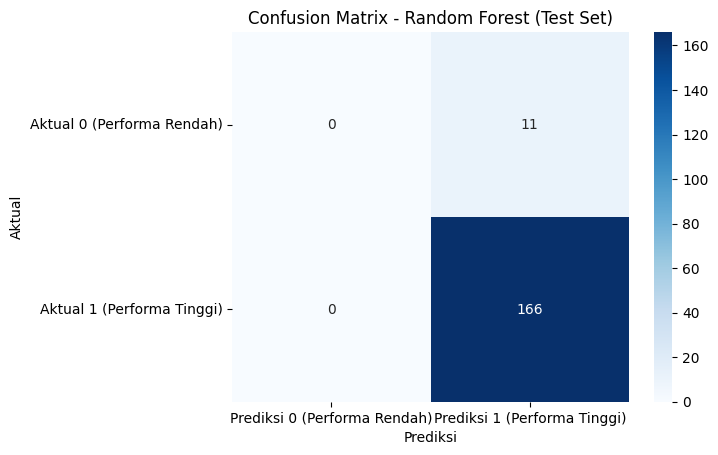

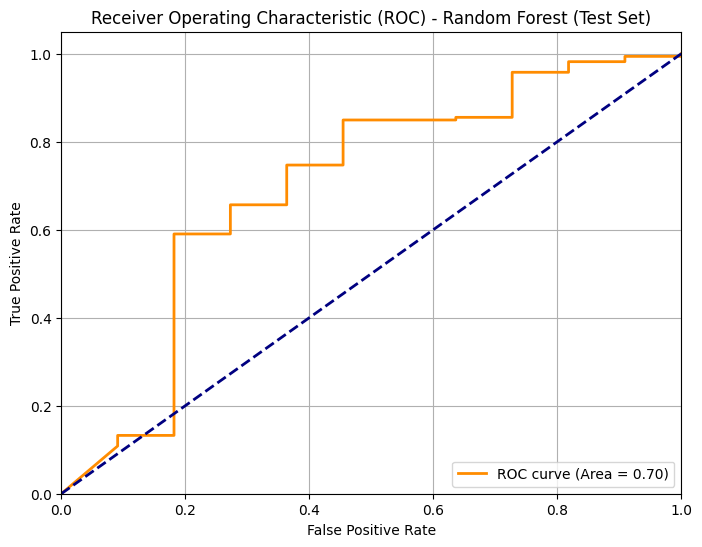


7. FEATURE IMPORTANCE DARI MODEL TERBAIK (Random Forest)


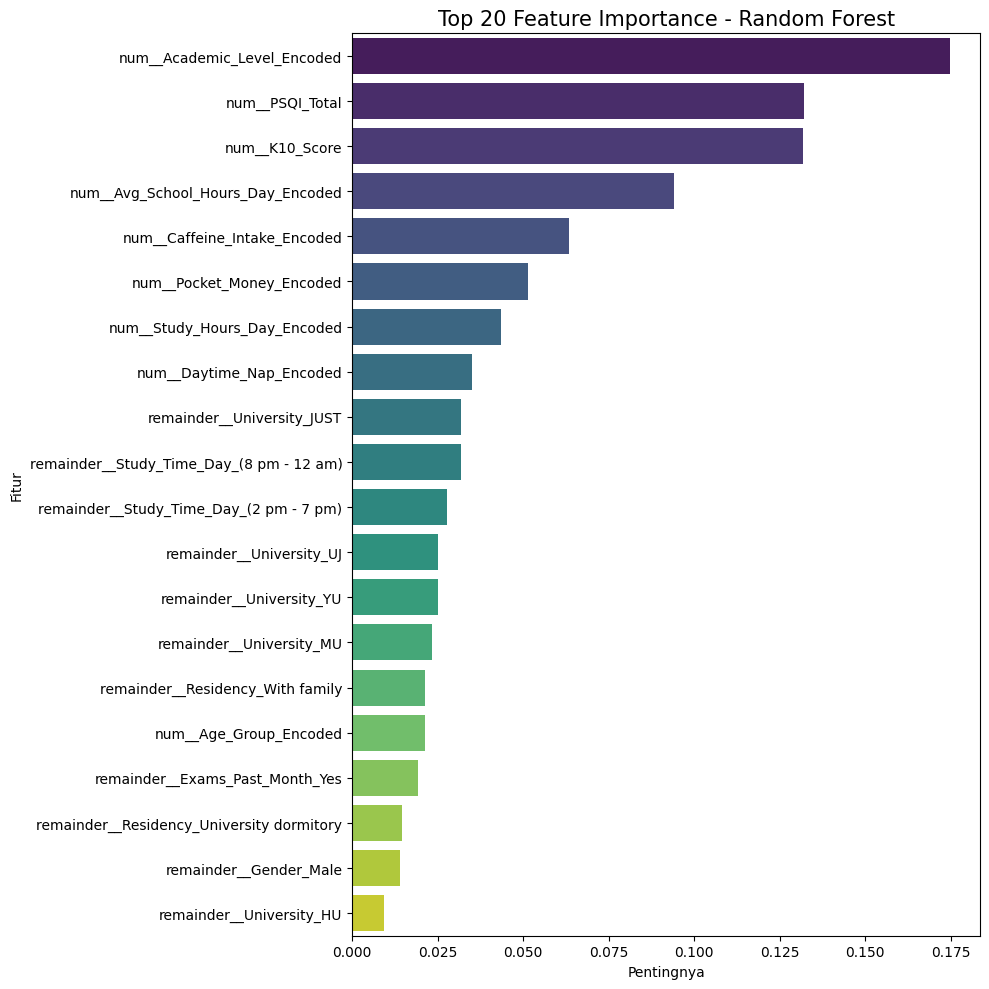


Detail Feature Importance (Model Terbaik):


,Fitur,Pentingnya
2,num__Academic_Level_Encoded,0.174785
0,num__PSQI_Total,0.132074
1,num__K10_Score,0.131654
7,num__Avg_School_Hours_Day_Encoded,0.094164
3,num__Caffeine_Intake_Encoded,0.063273
6,num__Pocket_Money_Encoded,0.051392
4,num__Study_Hours_Day_Encoded,0.043652
5,num__Daytime_Nap_Encoded,0.034914
17,remainder__University_JUST,0.031906
14,remainder__Study_Time_Day_(8 pm - 12 am),0.031809



FASE 4 (PEMODELAN MACHINE LEARNING DENGAN PIPELINE & GRIDSEARCHCV) SELESAI.
Selanjutnya: Fase 5 (Opsional: Clustering, Interpretasi ML Lanjutan jika waktu ada) & Fase 6 (Pengembangan Dashboard).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set_palette("husl")


if 'df_processed' not in locals() or df_processed is None:
    print("DataFrame 'df_processed' tidak terdefinisi. Jalankan Fase 1 terlebih dahulu.")
    exit()

print("MEMULAI FASE 4: PEMODELAN MACHINE LEARNING (Dengan Pipeline, ColumnTransformer, & GridSearchCV)")

# 1. Definisi Target Variabel (GAP_High_Performance)
if 'GAP_Encoded' in df_processed.columns:
    df_processed['GAP_High_Performance'] = df_processed['GAP_Encoded'].apply(lambda x: 1 if x >= 2 else 0)
    print("\nDistribusi Target 'GAP_High_Performance':")
    print(df_processed['GAP_High_Performance'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    y = df_processed['GAP_High_Performance']
else:
    print("Kolom 'GAP_Encoded' tidak ditemukan. Pastikan preprocessing Fase 1 sudah benar.")
    exit()

# 2. Pemilihan Fitur Awal (X)
feature_cols_to_consider = [
    'PSQI_Total', 
    'K10_Score',
    'Academic_Level_Encoded', 
    'Caffeine_Intake_Encoded',
    'Study_Hours_Day_Encoded', 
    'Daytime_Nap_Encoded',
    'Pocket_Money_Encoded',
    'Avg_School_Hours_Day_Encoded',
    'Age_Group_Encoded',
    'Gender_Male', 
    'Additional_Job_Yes',
    'Residency_University dormitory', 
    'Residency_With family',
    'Study_Time_Day_(2 pm - 7 pm)', 
    'Study_Time_Day_(8 pm - 12 am)',
    'Exams_Past_Month_Yes',
    'University_HU', 'University_JUST', 'University_MU', 'University_UJ', 'University_YU' 
]

# Filter hanya kolom yang ada di df_processed
X = df_processed[[col for col in feature_cols_to_consider if col in df_processed.columns]].copy()

print(f"\nJumlah fitur awal yang digunakan: {X.shape[1]}")
# print("Nama fitur awal:", X.columns.tolist())

if X.isnull().sum().sum() > 0:
    print(f"PERINGATAN: Ditemukan NaN di X sebelum pipeline: {X.isnull().sum().sum()}. Imputasi akan dilakukan di dalam pipeline.")
    # Tidak perlu imputasi di sini, akan ditangani oleh SimpleImputer di pipeline

# 3. Pembagian Data (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"\nUkuran data latih (X_train): {X_train.shape}, Ukuran data uji (X_test): {X_test.shape}")

# 4. Mendefinisikan Preprocessor dengan ColumnTransformer
# Identifikasi kolom numerik kontinu yang perlu di-impute dan di-scale
numerical_features_for_pipeline = [
    'PSQI_Total', 'K10_Score', 'Academic_Level_Encoded', 'Caffeine_Intake_Encoded',
    'Study_Hours_Day_Encoded', 'Daytime_Nap_Encoded', 'Pocket_Money_Encoded',
    'Avg_School_Hours_Day_Encoded', 'Age_Group_Encoded'
]
# Filter lagi, pastikan hanya kolom yang ada di X_train yang dimasukkan
numerical_features_in_X_train = [col for col in numerical_features_for_pipeline if col in X_train.columns]

# Buat transformer untuk fitur numerik: Imputasi dengan median, lalu scaling
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Ganti 'median' dengan 'mean' jika lebih sesuai
    ('scaler', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features_in_X_train)
    ], 
    remainder='passthrough' # Fitur lain (dummy/boolean) akan dilewatkan tanpa diubah
)


# 5. Mendefinisikan Model dan Parameter Grid untuk GridSearchCV
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # 5-fold CV

models_to_tune = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced'), # class_weight untuk imbalance
        "params": {
            "classifier__C": [0.01, 0.1, 1, 10], # Skala logaritmik untuk C
            "classifier__penalty": ["l1", "l2"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, class_weight='balanced'), # class_weight
        "params": {
            "classifier__n_estimators": [100, 150],
            "classifier__max_depth": [5, 10, 15],    
            "classifier__min_samples_split": [2, 5, 10],
            "classifier__min_samples_leaf": [1, 2, 4]
        }
    },
    # Menggunakan HistGradientBoostingClassifier yang mendukung class_weight dan lebih cepat
    "Hist Gradient Boosting": {
        "model": HistGradientBoostingClassifier(random_state=42, class_weight='balanced'), # Jika didukung, atau handle imbalance dengan cara lain
        "params": {
            "classifier__learning_rate": [0.01, 0.05, 0.1],
            "classifier__max_iter": [100, 150], # Mirip n_estimators
            "classifier__max_depth": [3, 5, 7]
        }
    }
}

best_cv_scores = {}
best_estimators_from_cv = {} # Menyimpan model terbaik dari GridSearchCV untuk setiap tipe algoritma

print("\n5. PELATIHAN MODEL DENGAN HYPERPARAMETER TUNING (GRIDSEARCHCV PADA DATA LATIH)")

for name, config in models_to_tune.items():
    print(f"\n--- Tuning Model: {name} ---")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', config['model'])])
    
  

    grid_search = GridSearchCV(pipeline, config['params'], cv=cv_stratified, 
                               scoring='roc_auc', n_jobs=-1, verbose=0) # Ubah verbose ke 1 atau 2 untuk detail
    grid_search.fit(X_train, y_train)
    
    best_estimators_from_cv[name] = grid_search.best_estimator_ # Model terbaik dengan parameter terbaik
    best_cv_scores[name] = grid_search.best_score_ # Skor CV terbaik (ROC AUC)
    
    print(f"Parameter terbaik untuk {name}: {grid_search.best_params_}")
    print(f"Skor ROC AUC terbaik dari CV untuk {name}: {best_cv_scores[name]:.4f}")

# Pilih model terbaik secara keseluruhan berdasarkan skor CV ROC AUC
best_overall_model_name_cv = max(best_cv_scores, key=best_cv_scores.get)
final_best_model_from_cv = best_estimators_from_cv[best_overall_model_name_cv]
print(f"\n--- Model Terbaik Keseluruhan berdasarkan Cross-Validation pada Data Latih: {best_overall_model_name_cv} (ROC AUC CV: {best_cv_scores[best_overall_model_name_cv]:.4f}) ---")


# 6. Evaluasi Akhir Model Terbaik pada Test Set (SATU KALI SAJA)
print(f"\n6. EVALUASI AKHIR MODEL TERBAIK ({best_overall_model_name_cv}) PADA TEST SET")
y_final_pred_test = final_best_model_from_cv.predict(X_test)
y_final_pred_proba_test = final_best_model_from_cv.predict_proba(X_test)[:, 1]

accuracy_final_test = accuracy_score(y_test, y_final_pred_test)
roc_auc_final_test = roc_auc_score(y_test, y_final_pred_proba_test)
f1_final_test_class1 = f1_score(y_test, y_final_pred_test, pos_label=1)
precision_final_test_class1 = precision_score(y_test, y_final_pred_test, pos_label=1)
recall_final_test_class1 = recall_score(y_test, y_final_pred_test, pos_label=1)

print(f"Test Accuracy: {accuracy_final_test:.4f}")
print(f"Test ROC AUC: {roc_auc_final_test:.4f}")
print(f"Test F1-Score (Class 1): {f1_final_test_class1:.4f}")
print(f"Test Precision (Class 1): {precision_final_test_class1:.4f}")
print(f"Test Recall (Class 1): {recall_final_test_class1:.4f}")

print("\nLaporan Klasifikasi Model Terbaik Keseluruhan pada Test Set:")
print(classification_report(y_test, y_final_pred_test))

print("Confusion Matrix Model Terbaik Keseluruhan pada Test Set:")
cm_final = confusion_matrix(y_test, y_final_pred_test)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Prediksi 0 (Performa Rendah)', 'Prediksi 1 (Performa Tinggi)'], 
            yticklabels=['Aktual 0 (Performa Rendah)', 'Aktual 1 (Performa Tinggi)'])
plt.title(f'Confusion Matrix - {best_overall_model_name_cv} (Test Set)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Plot ROC Curve untuk model terbaik
fpr, tpr, thresholds = roc_curve(y_test, y_final_pred_proba_test)
roc_auc_val = auc(fpr, tpr) # Seharusnya sama dengan roc_auc_final_test

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (Area = {roc_auc_val:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) - {best_overall_model_name_cv} (Test Set)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 7. Feature Importance dari Model Terbaik Keseluruhan
print(f"\n7. FEATURE IMPORTANCE DARI MODEL TERBAIK ({best_overall_model_name_cv})")
best_classifier_step = final_best_model_from_cv.named_steps['classifier']
preprocessor_step = final_best_model_from_cv.named_steps['preprocessor']

try:
    
    feature_names_transformed = preprocessor_step.get_feature_names_out()
except AttributeError:
    feature_names_transformed = X_train.columns 
    print("Peringatan: Menggunakan X_train.columns untuk nama fitur, mungkin kurang akurat jika ColumnTransformer kompleks.")


if hasattr(best_classifier_step, 'feature_importances_'):
    importances = best_classifier_step.feature_importances_
    if len(importances) == len(feature_names_transformed):
        feature_importance_df = pd.DataFrame({'Fitur': feature_names_transformed, 'Pentingnya': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Pentingnya', ascending=False)
        
        plt.figure(figsize=(10, max(6, min(20, len(feature_importance_df)) // 2) )) # Sesuaikan tinggi
        sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance_df.head(20), palette='viridis')
        plt.title(f'Top 20 Feature Importance - {best_overall_model_name_cv}', fontsize=15)
        plt.tight_layout()
        plt.show()
        
        print("\nDetail Feature Importance (Model Terbaik):")
        display(feature_importance_df.head(20))
    else:
        print(f"Jumlah feature importance ({len(importances)}) tidak cocok dengan jumlah nama fitur ({len(feature_names_transformed)}). Periksa preprocessor.")

elif hasattr(best_classifier_step, 'coef_'): # Untuk Logistic Regression
    coefficients = best_classifier_step.coef_[0]
    if len(coefficients) == len(feature_names_transformed):
        feature_importance_lr_df = pd.DataFrame({'Fitur': feature_names_transformed, 'Koefisien': coefficients})
        feature_importance_lr_df['Abs_Koefisien'] = np.abs(feature_importance_lr_df['Koefisien'])
        feature_importance_lr_df = feature_importance_lr_df.sort_values(by='Abs_Koefisien', ascending=False)
        print("\nKoefisien Model (diurutkan berdasarkan nilai absolut):")
        display(feature_importance_lr_df[['Fitur', 'Koefisien']].head(20))
    else:
        print(f"Jumlah koefisien ({len(coefficients)}) tidak cocok dengan jumlah nama fitur ({len(feature_names_transformed)}). Periksa preprocessor.")
else:
    print(f"Model {best_overall_model_name_cv} tidak memiliki 'feature_importances_' atau 'coef_'.")

print("\nFASE 4 (PEMODELAN MACHINE LEARNING DENGAN PIPELINE & GRIDSEARCHCV) SELESAI.")
print("Selanjutnya: Fase 5 (Opsional: Clustering, Interpretasi ML Lanjutan jika waktu ada) & Fase 6 (Pengembangan Dashboard).")

MEMULAI FASE 4: PEMODELAN MACHINE LEARNING (Dengan SMOTETomek, Pipeline, ColumnTransformer, & GridSearchCV)

Distribusi Target 'GAP_High_Performance':
GAP_High_Performance
1    93.8%
0     6.2%
Name: proportion, dtype: object

Jumlah fitur awal yang digunakan: 21

Ukuran data latih (X_train): (529, 21), Ukuran data uji (X_test): (177, 21)
Distribusi target di y_train:
GAP_High_Performance
1    0.937618
0    0.062382
Name: proportion, dtype: float64
Distribusi target di y_test:
GAP_High_Performance
1    0.937853
0    0.062147
Name: proportion, dtype: float64

5. PELATIHAN MODEL DENGAN HYPERPARAMETER TUNING (GRIDSEARCHCV PADA DATA LATIH DENGAN SMOTETomek)

--- Tuning Model: Logistic Regression ---
Parameter terbaik: {'classifier__C': 1, 'classifier__penalty': 'l1'}
Skor F1_macro terbaik dari CV: 0.5432

--- Tuning Model: Random Forest ---
Parameter terbaik: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 10, 'classifier__n_estimators': 100}
Skor F1_macro terbaik dari CV: 0.5

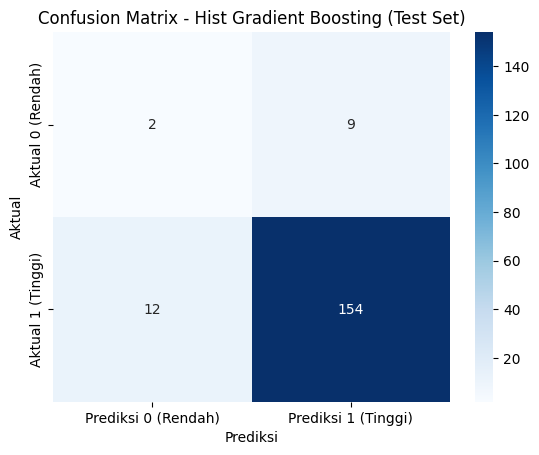

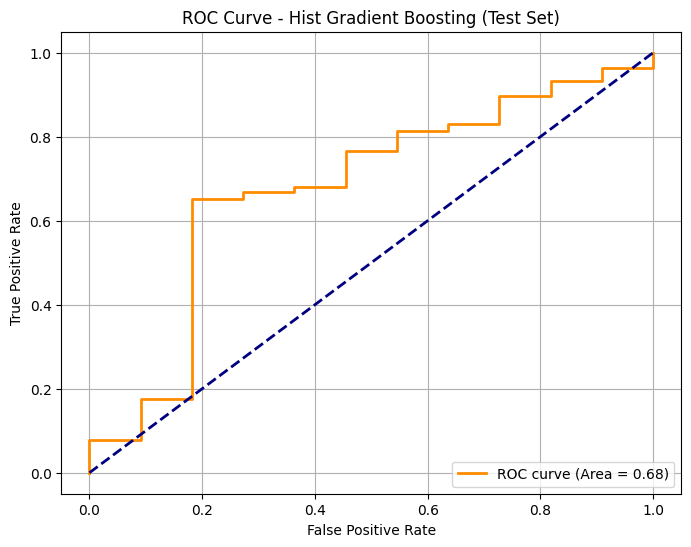

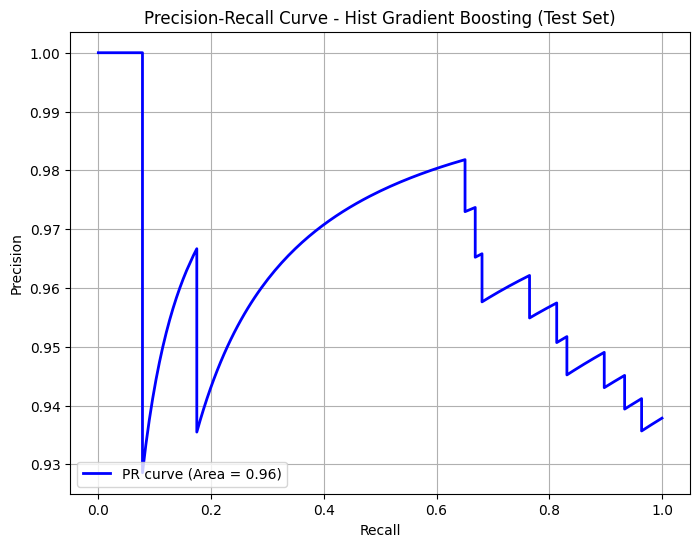


7. FEATURE IMPORTANCE DARI MODEL TERBAIK (Hist Gradient Boosting)
Model Hist Gradient Boosting tidak memiliki 'feature_importances_' atau 'coef_'.

FASE 4 (PEMODELAN MACHINE LEARNING DENGAN PERBAIKAN) SELESAI.
Selanjutnya: Fase 6 (Pengembangan Dashboard). Fase 5 (Clustering/Interpretasi Lanjutan) bisa dilewati jika waktu terbatas.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    auc,
)
from sklearn.pipeline import Pipeline

# Impor SMOTE + undersampling (SMOTETomek) dari imblearn
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline

import warnings
warnings.filterwarnings("ignore")
plt.style.use("default")
sns.set_palette("husl")

# --------------------------------------
#  Load DataFrame
# --------------------------------------
df_processed = pd.read_csv("/kaggle/input/cleaned1/dataset_final_processed.csv")

if df_processed is None or "GAP_Encoded" not in df_processed.columns:
    print("DataFrame 'df_processed' tidak terdefinisi atau kolom 'GAP_Encoded' tidak ada. Jalankan Fase 1 terlebih dahulu.")
    exit()

print("MEMULAI FASE 4: PEMODELAN MACHINE LEARNING (Dengan SMOTETomek, Pipeline, ColumnTransformer, & GridSearchCV)")

#  1. Definisi Target Variabel (GAP_High_Performance)

df_processed["GAP_High_Performance"] = df_processed["GAP_Encoded"].apply(lambda x: 1 if x >= 2 else 0)
print("\nDistribusi Target 'GAP_High_Performance':")
y_value_counts = df_processed["GAP_High_Performance"].value_counts(normalize=True).mul(100).round(1)
print(y_value_counts.astype(str) + "%")
y = df_processed["GAP_High_Performance"]

#  2. Pemilihan Fitur Awal (X)
feature_cols_to_consider = [
    "PSQI_Total",
    "K10_Score",
    "Academic_Level_Encoded",
    "Caffeine_Intake_Encoded",
    "Study_Hours_Day_Encoded",
    "Daytime_Nap_Encoded",
    "Pocket_Money_Encoded",
    "Avg_School_Hours_Day_Encoded",
    "Age_Group_Encoded",
    "Gender_Male",
    "Additional_Job_Yes",
    "Residency_University dormitory",
    "Residency_With family",
    "Study_Time_Day_(2 pm - 7 pm)",
    "Study_Time_Day_(8 pm - 12 am)",
    "Exams_Past_Month_Yes",
    "University_HU",
    "University_JUST",
    "University_MU",
    "University_UJ",
    "University_YU",
]
X = df_processed[[col for col in feature_cols_to_consider if col in df_processed.columns]].copy()
print(f"\nJumlah fitur awal yang digunakan: {X.shape[1]}")

if X.isnull().sum().sum() > 0:
    print(f"PERINGATAN: Ditemukan NaN di X sebelum pipeline: {X.isnull().sum().sum()}. Imputasi akan dilakukan di dalam pipeline.")

#  3. Pembagian Data (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"\nUkuran data latih (X_train): {X_train.shape}, Ukuran data uji (X_test): {X_test.shape}")
print(f"Distribusi target di y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribusi target di y_test:\n{y_test.value_counts(normalize=True)}")

#  4. Mendefinisikan Preprocessor dengan ColumnTransformer
numerical_features_for_pipeline = [
    "PSQI_Total",
    "K10_Score",
    "Academic_Level_Encoded",
    "Caffeine_Intake_Encoded",
    "Study_Hours_Day_Encoded",
    "Daytime_Nap_Encoded",
    "Pocket_Money_Encoded",
    "Avg_School_Hours_Day_Encoded",
    "Age_Group_Encoded",
]
numerical_features_in_X_train = [col for col in numerical_features_for_pipeline if col in X_train.columns]

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numerical_features_in_X_train)],
    remainder="passthrough",
)

#  5. Menentukan SMOTETomek
# Karena kita ingin oversampling + undersampling
smote_tomek = SMOTETomek(random_state=42)

#  6. Mendefinisikan Model dan Parameter Grid untuk GridSearchCV
#   (Dengan hyperparameter yang lebih sederhana untuk mengurangi overfit)
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hitung scale_pos_weight untuk XGBoost jika nanti ingin menambahkan
# (jumlah mayoritas / jumlah minoritas) pada data latih
n_minority_train = sum(y_train == 0)
n_majority_train = sum(y_train == 1)
scale_pos_weight_ratio = n_majority_train / n_minority_train if n_minority_train > 0 else 1

models_to_tune = {
    "Logistic Regression": {
        "model": LogisticRegression(
            random_state=42, solver="liblinear", class_weight="balanced"
        ),
        "params": {
            "classifier__C": [0.1, 1],  # cuma dua opsi agar lebih sederhana
            "classifier__penalty": ["l1", "l2"],
        },
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42, class_weight="balanced"),
        "params": {
            "classifier__n_estimators": [50, 100],  # lebih rendah jumlah estimator
            "classifier__max_depth": [3, 5],  # pohon yang lebih dangkal
            "classifier__min_samples_leaf": [5, 10],  # daun lebih besar
        },
    },
    "Hist Gradient Boosting": {
        "model": HistGradientBoostingClassifier(
            random_state=42, class_weight="balanced"
        ),
        "params": {
            "classifier__learning_rate": [0.05],  # satu opsi learning rate
            "classifier__max_iter": [50, 100],  # lebih sedikit iterasi
            "classifier__max_depth": [3],  # kedalaman tetap kecil
        },
    },
}

best_cv_scores = {}
best_estimators_from_cv = {}

print("\n5. PELATIHAN MODEL DENGAN HYPERPARAMETER TUNING (GRIDSEARCHCV PADA DATA LATIH DENGAN SMOTETomek)")

for name, config in models_to_tune.items():
    print(f"\n--- Tuning Model: {name} ---")

    pipeline = ImbPipeline(
        steps=[
            ("preprocessor", preprocessor),
            ("smote_tomek", smote_tomek),
            ("classifier", config["model"]),
        ]
    )

    grid_search = GridSearchCV(
        pipeline,
        config["params"],
        cv=cv_stratified,
        scoring="f1_macro",  # optimize for balanced metric
        n_jobs=-1,
        verbose=0,
    )
    grid_search.fit(X_train, y_train)

    best_estimators_from_cv[name] = grid_search.best_estimator_
    best_cv_scores[name] = grid_search.best_score_

    print(f"Parameter terbaik: {grid_search.best_params_}")
    print(f"Skor F1_macro terbaik dari CV: {best_cv_scores[name]:.4f}")

# Pilih model terbaik secara keseluruhan berdasarkan skor F1_macro
best_overall_model_name_cv = max(best_cv_scores, key=best_cv_scores.get)
final_best_model_from_cv = best_estimators_from_cv[best_overall_model_name_cv]
print(
    f"\n--- Model Terbaik Keseluruhan berdasarkan Cross-Validation pada Data Latih: "
    f"{best_overall_model_name_cv} (F1_macro CV: {best_cv_scores[best_overall_model_name_cv]:.4f}) ---"
)

# --------------------------------------
#  7. Evaluasi Akhir Model Terbaik pada Test Set
# --------------------------------------
print(f"\n6. EVALUASI AKHIR MODEL TERBAIK ({best_overall_model_name_cv}) PADA TEST SET")
y_final_pred_test = final_best_model_from_cv.predict(X_test)
y_final_pred_proba_test = final_best_model_from_cv.predict_proba(X_test)[:, 1]

accuracy_final_test = accuracy_score(y_test, y_final_pred_test)
f1_macro_final_test = f1_score(y_test, y_final_pred_test, average="macro")
precision_final_test_class1 = precision_score(y_test, y_final_pred_test, pos_label=1)
recall_final_test_class1 = recall_score(y_test, y_final_pred_test, pos_label=1)
roc_auc_final_test = roc_auc_score(y_test, y_final_pred_proba_test)

print(f"Test Accuracy: {accuracy_final_test:.4f}")
print(f"Test F1_macro: {f1_macro_final_test:.4f}")
print(f"Test Precision (Class 1): {precision_final_test_class1:.4f}")
print(f"Test Recall (Class 1): {recall_final_test_class1:.4f}")
print(f"Test ROC AUC: {roc_auc_final_test:.4f}")

print("\nLaporan Klasifikasi Model Terbaik pada Test Set:")
try:
    report_test = classification_report(y_test, y_final_pred_test)
    print(report_test)
except ValueError as e:
    print(f"Tidak bisa membuat classification report: {e}")
    print("Cek distribusi prediksi dan aktual pada test set.")

print("\nConfusion Matrix Model Terbaik pada Test Set:")
cm_final = confusion_matrix(y_test, y_final_pred_test)
sns.heatmap(
    cm_final,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Prediksi 0 (Rendah)", "Prediksi 1 (Tinggi)"],
    yticklabels=["Aktual 0 (Rendah)", "Aktual 1 (Tinggi)"],
)
plt.title(f"Confusion Matrix - {best_overall_model_name_cv} (Test Set)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_final_pred_proba_test)
roc_auc_val = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (Area = {roc_auc_val:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title(f"ROC Curve - {best_overall_model_name_cv} (Test Set)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_final_pred_proba_test)
pr_auc_val = auc(recall_vals, precision_vals)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color="blue", lw=2, label=f"PR curve (Area = {pr_auc_val:.2f})")
plt.title(f"Precision-Recall Curve - {best_overall_model_name_cv} (Test Set)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

# --------------------------------------
#  8. Feature Importance dari Model Terbaik
# --------------------------------------
print(f"\n7. FEATURE IMPORTANCE DARI MODEL TERBAIK ({best_overall_model_name_cv})")
best_classifier_step = final_best_model_from_cv.named_steps["classifier"]
preprocessor_step = final_best_model_from_cv.named_steps["preprocessor"]

try:
    feature_names_transformed = preprocessor_step.get_feature_names_out()
except AttributeError:
    feature_names_transformed = X_train.columns
    print("Peringatan: Menggunakan X_train.columns untuk nama fitur.")

if hasattr(best_classifier_step, "feature_importances_"):
    importances = best_classifier_step.feature_importances_
    if len(importances) == len(feature_names_transformed):
        feature_importance_df = pd.DataFrame(
            {"Fitur": feature_names_transformed, "Pentingnya": importances}
        ).sort_values(by="Pentingnya", ascending=False)
        plt.figure(
            figsize=(10, max(6, min(20, len(feature_importance_df)) // 2))
        )
        sns.barplot(
            x="Pentingnya",
            y="Fitur",
            data=feature_importance_df.head(20),
            palette="viridis",
        )
        plt.title(f"Top 20 Feature Importance - {best_overall_model_name_cv}")
        plt.tight_layout()
        plt.show()

        print("\nDetail Feature Importance (Model Terbaik):")
        display(feature_importance_df.head(20))
    else:
        print(
            f"Jumlah feature importance ({len(importances)}) tidak cocok dengan jumlah nama fitur ({len(feature_names_transformed)})."
        )
elif hasattr(best_classifier_step, "coef_"):
    coefs = best_classifier_step.coef_[0]
    if len(coefs) == len(feature_names_transformed):
        feature_importance_lr_df = pd.DataFrame(
            {"Fitur": feature_names_transformed, "Koefisien": coefs}
        )
        feature_importance_lr_df["Abs_Koefisien"] = np.abs(feature_importance_lr_df["Koefisien"])
        feature_importance_lr_df = feature_importance_lr_df.sort_values(
            by="Abs_Koefisien", ascending=False
        )
        print("\nKoefisien Model (diurutkan berdasarkan nilai absolut):")
        display(feature_importance_lr_df[["Fitur", "Koefisien"]].head(20))
    else:
        print(
            f"Jumlah koefisien ({len(coefs)}) tidak cocok dengan jumlah nama fitur ({len(feature_names_transformed)})."
        )
else:
    print(f"Model {best_overall_model_name_cv} tidak memiliki 'feature_importances_' atau 'coef_'.")

print("\nFASE 4 (PEMODELAN MACHINE LEARNING DENGAN PERBAIKAN) SELESAI.")
print("Selanjutnya: Fase 6 (Pengembangan Dashboard). Fase 5 (Clustering/Interpretasi Lanjutan) bisa dilewati jika waktu terbatas.")


In [4]:
import pandas as pd

if 'df_processed' not in locals() or df_processed is None:
    print("DataFrame 'df_processed' tidak terdefinisi. Jalankan Fase 1 terlebih dahulu.")
    # exit() # Sebaiknya ada cara untuk menghentikan eksekusi jika df_processed tidak ada

print("\nMEMULAI FASE 5: ANALISIS KLASTER (UNSUPERVISED LEARNING)")
print("-----------------------------------------------------------")
print("Bagian 1: Pemilihan Fitur untuk Clustering")
df_processed = pd.read_csv("/kaggle/input/cleaned1/dataset_final_processed.csv")

# 1. Pemilihan Fitur untuk Clustering
# Pilih fitur numerik/ordinal yang relevan untuk membentuk profil
# Ini adalah daftar awal, Anda bisa menyesuaikannya.
features_for_clustering = [
    'PSQI_Total', 
    'K10_Score', 
    'GAP_Encoded', 
    'Study_Hours_Day_Encoded',
    'Caffeine_Intake_Encoded',
    'Daytime_Nap_Encoded',
    'Avg_School_Hours_Day_Encoded', # Pastikan nama kolom ini benar setelah rename
    'Age_Group_Encoded'
]

# Pastikan semua kolom yang dipilih ada di df_processed
existing_features_for_clustering = [col for col in features_for_clustering if col in df_processed.columns]

if len(existing_features_for_clustering) != len(features_for_clustering):
    print("\nPeringatan: Beberapa fitur yang dipilih untuk clustering tidak ditemukan di DataFrame.")
    print(f"Fitur yang dipilih awal: {features_for_clustering}")
    print(f"Fitur yang benar-benar ada: {existing_features_for_clustering}")

X_cluster_raw = df_processed[existing_features_for_clustering].copy() # Gunakan raw untuk data sebelum scaling

# Periksa dan tangani NaN jika ada (seharusnya sudah bersih dari Fase 1, tapi cek lagi untuk subset ini)
if X_cluster_raw.isnull().sum().sum() > 0:
    print(f"\nMenangani NaN di X_cluster_raw dengan imputasi median (jumlah NaN: {X_cluster_raw.isnull().sum().sum()})")
    for col in X_cluster_raw.columns:
        if X_cluster_raw[col].isnull().any():
            X_cluster_raw[col].fillna(X_cluster_raw[col].median(), inplace=True) # Imputasi dengan median
    print("NaN telah ditangani pada data untuk clustering.")
else:
    print("\nTidak ada NaN pada fitur yang dipilih untuk clustering.")


print(f"\nFitur yang akan digunakan untuk clustering ({X_cluster_raw.shape[1]} fitur): {X_cluster_raw.columns.tolist()}")
print("\nContoh data untuk clustering (5 baris pertama):")
display(X_cluster_raw.head())
print("\nStatistik deskriptif fitur untuk clustering:")
display(X_cluster_raw.describe())
print("-----------------------------------------------------------")

DataFrame 'df_processed' tidak terdefinisi. Jalankan Fase 1 terlebih dahulu.

MEMULAI FASE 5: ANALISIS KLASTER (UNSUPERVISED LEARNING)
-----------------------------------------------------------
Bagian 1: Pemilihan Fitur untuk Clustering

Tidak ada NaN pada fitur yang dipilih untuk clustering.

Fitur yang akan digunakan untuk clustering (8 fitur): ['PSQI_Total', 'K10_Score', 'GAP_Encoded', 'Study_Hours_Day_Encoded', 'Caffeine_Intake_Encoded', 'Daytime_Nap_Encoded', 'Avg_School_Hours_Day_Encoded', 'Age_Group_Encoded']

Contoh data untuk clustering (5 baris pertama):


,PSQI_Total,K10_Score,GAP_Encoded,Study_Hours_Day_Encoded,Caffeine_Intake_Encoded,Daytime_Nap_Encoded,Avg_School_Hours_Day_Encoded,Age_Group_Encoded
0,17,50,0,5,4,0,2.5,0
1,11,33,4,2,4,0,2.5,1
2,12,43,2,2,1,0,6.0,1
3,11,21,3,7,3,2,2.5,1
4,8,15,3,5,3,0,3.5,0



Statistik deskriptif fitur untuk clustering:


,PSQI_Total,K10_Score,GAP_Encoded,Study_Hours_Day_Encoded,Caffeine_Intake_Encoded,Daytime_Nap_Encoded,Avg_School_Hours_Day_Encoded,Age_Group_Encoded
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,8.165722,26.869688,2.786119,4.287535,2.623229,1.031161,3.674221,0.634561
std,3.676571,8.700209,0.948836,2.338282,1.172848,0.953764,1.279445,0.510481
min,0.000000,10.000000,0.000000,2.000000,0.000000,0.000000,1.500000,0.000000
25%,5.000000,20.000000,2.000000,2.000000,2.000000,0.000000,2.500000,0.000000
50%,8.000000,26.000000,3.000000,5.000000,3.000000,1.000000,3.500000,1.000000
75%,11.000000,32.000000,3.000000,5.000000,3.000000,2.000000,4.500000,1.000000
max,20.000000,50.000000,4.000000,9.000000,4.000000,2.000000,6.000000,2.000000


-----------------------------------------------------------


In [5]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Pastikan pandas sudah diimport



print("\nBagian 2: Scaling Fitur untuk Clustering")

# Inisialisasi Scaler
scaler_cluster = StandardScaler()

# Fit dan transform data fitur
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster_raw)

# Konversi hasil scaling (array NumPy) kembali ke DataFrame Pandas untuk kemudahan inspeksi
# (opsional, tapi baik untuk dilihat)
X_cluster_scaled_df = pd.DataFrame(X_cluster_scaled, columns=X_cluster_raw.columns, index=X_cluster_raw.index)

print("\nFitur berhasil di-scaling.")
print("Contoh data setelah scaling (5 baris pertama):")
display(X_cluster_scaled_df.head())
print("\nStatistik deskriptif fitur setelah scaling (seharusnya mean mendekati 0, std mendekati 1):")
display(X_cluster_scaled_df.describe().round(2)) # Dibulatkan untuk kemudahan pembacaan
print("-----------------------------------------------------------")


Bagian 2: Scaling Fitur untuk Clustering

Fitur berhasil di-scaling.
Contoh data setelah scaling (5 baris pertama):


,PSQI_Total,K10_Score,GAP_Encoded,Study_Hours_Day_Encoded,Caffeine_Intake_Encoded,Daytime_Nap_Encoded,Avg_School_Hours_Day_Encoded,Age_Group_Encoded
0,2.404561,2.660478,-2.938437,0.304912,1.174701,-1.081916,-0.918409,-1.243945
1,0.771449,0.705116,1.280244,-0.978991,1.174701,-1.081916,-0.918409,0.716379
2,1.043634,1.855329,-0.829096,-0.978991,-1.384988,-1.081916,1.819092,0.716379
3,0.771449,-0.675139,0.225574,1.160847,0.321472,1.016525,-0.918409,0.716379
4,-0.045107,-1.365267,0.225574,0.304912,0.321472,-1.081916,-0.136266,-1.243945



Statistik deskriptif fitur setelah scaling (seharusnya mean mendekati 0, std mendekati 1):


,PSQI_Total,K10_Score,GAP_Encoded,Study_Hours_Day_Encoded,Caffeine_Intake_Encoded,Daytime_Nap_Encoded,Avg_School_Hours_Day_Encoded,Age_Group_Encoded
count,706.00,706.00,706.00,706.00,706.00,706.00,706.00,706.00
mean,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.22,-1.94,-2.94,-0.98,-2.24,-1.08,-1.70,-1.24
25%,-0.86,-0.79,-0.83,-0.98,-0.53,-1.08,-0.92,-1.24
50%,-0.05,-0.10,0.23,0.30,0.32,-0.03,-0.14,0.72
75%,0.77,0.59,0.23,0.30,0.32,1.02,0.65,0.72
max,3.22,2.66,1.28,2.02,1.17,1.02,1.82,2.68


-----------------------------------------------------------



Bagian 3: Menentukan Jumlah Klaster Optimal (K)
Menghitung SSE dan Silhouette Score untuk K dari 2 hingga 10...
Perhitungan SSE dan Silhouette Score selesai.


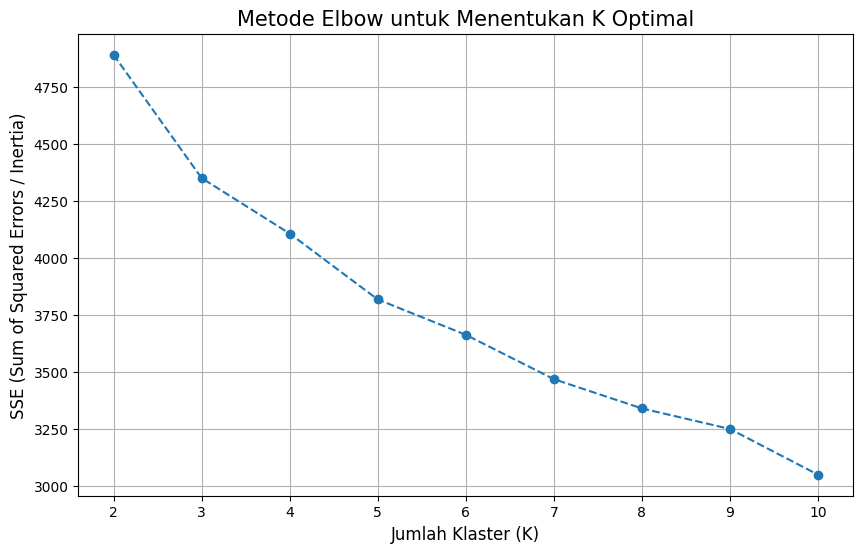

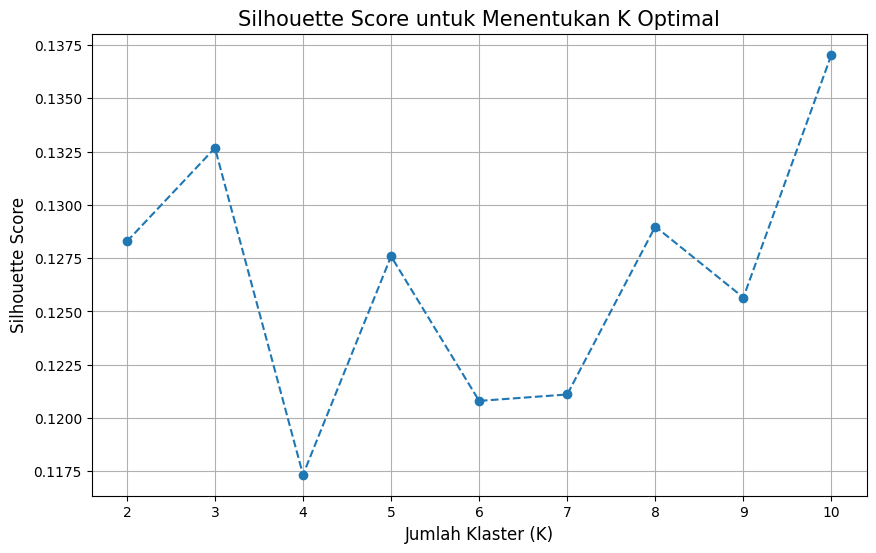


K optimal berdasarkan Silhouette Score tertinggi: 10 (Score: 0.1370)
-----------------------------------------------------------


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Untuk Silhouette Score
import matplotlib.pyplot as plt
import pandas as pd # Pastikan pandas sudah diimport
import numpy as np

print("\nBagian 3: Menentukan Jumlah Klaster Optimal (K)")

# Inisialisasi list untuk menyimpan nilai SSE dan Silhouette Scores
sse = {}
silhouette_scores = {}
k_range = range(2, 11) # Kita akan mencoba K dari 2 hingga 10

# 1. Menghitung SSE dan Silhouette Score untuk berbagai nilai K
print("Menghitung SSE dan Silhouette Score untuk K dari 2 hingga 10...")
for k_value in k_range:
    kmeans = KMeans(n_clusters=k_value, init='k-means++', random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_cluster_scaled_df) # Fit dan dapatkan label klaster
    
    sse[k_value] = kmeans.inertia_ # SSE adalah atribut 'inertia_' dari model KMeans
    
    # Silhouette score membutuhkan minimal 2 klaster dan labelnya
    # dan juga minimal 2 sampel per klaster, yang biasanya terpenuhi
    if len(set(cluster_labels)) > 1: # Pastikan ada lebih dari 1 klaster terbentuk
        silhouette_scores[k_value] = silhouette_score(X_cluster_scaled_df, cluster_labels)
    else:
        silhouette_scores[k_value] = -1 # Indikasi tidak valid atau hanya 1 klaster terbentuk

print("Perhitungan SSE dan Silhouette Score selesai.")

# 2. Plot Metode Elbow
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o', linestyle='--')
plt.xlabel("Jumlah Klaster (K)", fontsize=12)
plt.ylabel("SSE (Sum of Squared Errors / Inertia)", fontsize=12)
plt.title("Metode Elbow untuk Menentukan K Optimal", fontsize=15)
plt.xticks(list(sse.keys()))
plt.grid(True)
plt.show()

# 3. Plot Silhouette Score
if silhouette_scores: # Hanya plot jika silhouette_scores tidak kosong
    plt.figure(figsize=(10, 6))
    # Filter nilai -1 jika ada (yang berarti silhouette score tidak bisa dihitung)
    valid_silhouette_k = [k for k, v in silhouette_scores.items() if v != -1]
    valid_silhouette_v = [v for k, v in silhouette_scores.items() if v != -1]
    
    if valid_silhouette_k: # Hanya plot jika ada nilai silhouette yang valid
        plt.plot(valid_silhouette_k, valid_silhouette_v, marker='o', linestyle='--')
        plt.xlabel("Jumlah Klaster (K)", fontsize=12)
        plt.ylabel("Silhouette Score", fontsize=12)
        plt.title("Silhouette Score untuk Menentukan K Optimal", fontsize=15)
        plt.xticks(valid_silhouette_k)
        plt.grid(True)
        plt.show()
        
        # Menentukan K optimal berdasarkan silhouette score tertinggi
        if valid_silhouette_v:
            optimal_k_silhouette = valid_silhouette_k[np.argmax(valid_silhouette_v)]
            print(f"\nK optimal berdasarkan Silhouette Score tertinggi: {optimal_k_silhouette} (Score: {max(valid_silhouette_v):.4f})")
        else:
            print("\nTidak ada Silhouette Score yang valid untuk menentukan K optimal.")
    else:
        print("\nTidak ada Silhouette Score yang valid untuk diplot.")
else:
    print("\nPerhitungan Silhouette Score tidak menghasilkan nilai.")
print("-----------------------------------------------------------")


Bagian 4: Menerapkan Algoritma Clustering (K-Means)
Menggunakan K Optimal yang dipilih: 4

Label klaster (K=4) berhasil ditambahkan ke DataFrame.
Contoh data dengan label klaster (5 baris pertama dari X_cluster_raw):


,PSQI_Total,K10_Score,GAP_Encoded,Study_Hours_Day_Encoded,Caffeine_Intake_Encoded,Daytime_Nap_Encoded,Avg_School_Hours_Day_Encoded,Age_Group_Encoded,Cluster_Labels
0,17,50,0,5,4,0,2.5,0,1
1,11,33,4,2,4,0,2.5,1,0
2,12,43,2,2,1,0,6.0,1,2
3,11,21,3,7,3,2,2.5,1,0
4,8,15,3,5,3,0,3.5,0,3



Distribusi jumlah anggota per klaster:
Cluster_Labels
0    233
1    142
2    133
3    198
Name: count, dtype: int64
-----------------------------------------------------------

Bagian 5: Analisis dan Interpretasi Profil Klaster

Analisis Profil Klaster (Rata-rata Fitur per Klaster):


,PSQI_Total,K10_Score,GAP_Encoded,Study_Hours_Day_Encoded,Caffeine_Intake_Encoded,Daytime_Nap_Encoded,Avg_School_Hours_Day_Encoded,Age_Group_Encoded
Cluster_Labels,,,,,,,,
0,5.92,21.35,2.96,3.22,2.85,0.91,3.16,0.88
1,12.46,35.92,2.24,4.13,3.01,1.38,3.26,0.65
2,7.98,28.36,2.49,2.99,1.75,1.33,5.00,0.92
3,7.85,25.87,3.18,6.53,2.66,0.73,3.69,0.14



Memilih subset fitur kunci untuk visualisasi bar chart profil klaster (contoh 5 fitur pertama)...


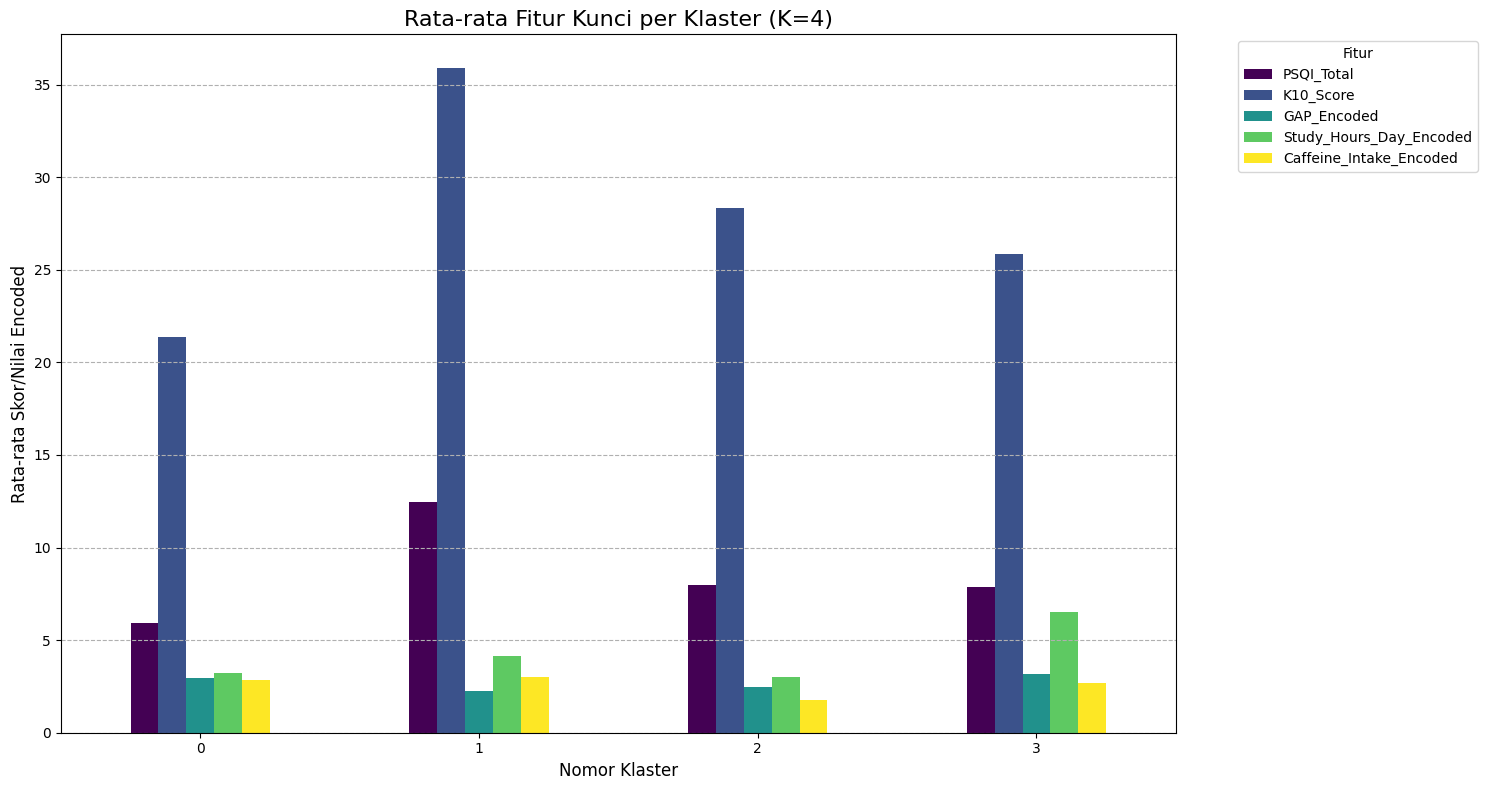


Interpretasi Profil Klaster (berdasarkan tabel rata-rata di atas):
Silakan analisis tabel 'cluster_profiles' dan visualisasinya untuk memberikan nama deskriptif pada setiap klaster.
Contoh format interpretasi (Anda perlu menyesuaikannya berdasarkan data Anda):

FASE 5 (ANALISIS KLASTER & INTERPRETASI PROFIL) SELESAI.
Selanjutnya: Fase 6 - Pengembangan Dashboard. Insight klaster ini akan sangat berguna!
-----------------------------------------------------------


In [8]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("\nBagian 4: Menerapkan Algoritma Clustering (K-Means)")

# --- Pilih K Optimal berdasarkan analisis sebelumnya (Metode Elbow / Silhouette) ---
OPTIMAL_K = 4 
print(f"Menggunakan K Optimal yang dipilih: {OPTIMAL_K}")

# Menerapkan K-Means dengan K Optimal
kmeans_final = KMeans(n_clusters=OPTIMAL_K, init='k-means++', random_state=42, n_init='auto')
# Latih model pada data yang sudah di-scale
cluster_labels_pred = kmeans_final.fit_predict(X_cluster_scaled_df)

# Tambahkan label klaster ke DataFrame asli (df_processed) dan ke X_cluster_raw (untuk analisis profil)
df_processed['Cluster_Labels'] = cluster_labels_pred
X_cluster_raw['Cluster_Labels'] = cluster_labels_pred # Untuk kemudahan analisis profil dengan nilai asli

print(f"\nLabel klaster (K={OPTIMAL_K}) berhasil ditambahkan ke DataFrame.")
print("Contoh data dengan label klaster (5 baris pertama dari X_cluster_raw):")
display(X_cluster_raw.head())

print("\nDistribusi jumlah anggota per klaster:")
print(X_cluster_raw['Cluster_Labels'].value_counts().sort_index())
print("-----------------------------------------------------------")

print("\nBagian 5: Analisis dan Interpretasi Profil Klaster")

# 1. Hitung Rata-rata Fitur per Klaster (menggunakan data asli sebelum scaling untuk interpretasi)
print("\nAnalisis Profil Klaster (Rata-rata Fitur per Klaster):")
cluster_profiles = X_cluster_raw.groupby('Cluster_Labels').mean().round(2)
display(cluster_profiles)

# 2. Visualisasi Profil Klaster

features_to_profile_plot = X_cluster_raw.drop(columns=['Cluster_Labels']).columns.tolist()

if len(features_to_profile_plot) > 5: # Batasi jumlah fitur untuk plot bar agar tidak terlalu ramai
    print(f"\nMemilih subset fitur kunci untuk visualisasi bar chart profil klaster (contoh 5 fitur pertama)...")
  
    default_features_for_bar = ['PSQI_Total', 'K10_Score', 'GAP_Encoded', 'Study_Hours_Day_Encoded', 'Caffeine_Intake_Encoded']
    features_for_bar_plot = [col for col in default_features_for_bar if col in cluster_profiles.columns]
else:
    features_for_bar_plot = features_to_profile_plot

if features_for_bar_plot:
    cluster_profiles[features_for_bar_plot].plot(kind='bar', figsize=(15, 8), colormap='viridis')
    plt.title(f'Rata-rata Fitur Kunci per Klaster (K={OPTIMAL_K})', fontsize=16)
    plt.ylabel('Rata-rata Skor/Nilai Encoded', fontsize=12)
    plt.xlabel('Nomor Klaster', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Fitur', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada fitur yang dipilih untuk visualisasi bar chart profil klaster.")



# 3. Interpretasi Manual dan Pemberian Nama Klaster
print("\nInterpretasi Profil Klaster (berdasarkan tabel rata-rata di atas):")
print("Silakan analisis tabel 'cluster_profiles' dan visualisasinya untuk memberikan nama deskriptif pada setiap klaster.")
print("Contoh format interpretasi (Anda perlu menyesuaikannya berdasarkan data Anda):")

print("\nFASE 5 (ANALISIS KLASTER & INTERPRETASI PROFIL) SELESAI.")
print("Selanjutnya: Fase 6 - Pengembangan Dashboard. Insight klaster ini akan sangat berguna!")
print("-----------------------------------------------------------")

In [11]:
# --- Simpan DataFrame dengan Label Klaster ke CSV ---
df_processed.to_csv("data_klaster_lengkap.csv", index=False)
X_cluster_raw.to_csv("data_klaster_nilai_asli.csv", index=False)
cluster_profiles.to_csv("profil_klaster_rata_rata.csv")



## Fase 5: Interpretasi dan Insight Profil Klaster (K=4)

Berdasarkan analisis K-Means dengan K=4, berhasil diidentifikasi 4 profil mahasiswa yang berbeda berdasarkan kombinasi kualitas tidur (PSQI), tingkat distres psikologis (K10), pencapaian akademik (GAP), jam belajar, konsumsi kafein, kebiasaan tidur siang, rata-rata jam sekolah, dan kelompok usia. Berikut adalah interpretasi untuk masing-masing klaster:

---

### Klaster 0: "Mahasiswa Seimbang & Berprestasi Cukup" (n=233)

* **Kualitas Tidur (`PSQI_Total`)**: Rata-rata **5.92** (Mendekati batas atas kualitas tidur "Baik", bisa dianggap tidur cukup baik/sedang awal).
* **Distres Psikologis (`K10_Score`)**: Rata-rata **21.35** (Masuk kategori distres "Ringan").
* **Pencapaian Akademik (`GAP_Encoded`)**: Rata-rata **2.96** (Mendekati "Very good", menandakan pencapaian akademik yang baik).
* **Jam Belajar (`Study_Hours_Day_Encoded`)**: Rata-rata **3.22** (Relatif rendah ke sedang, mungkin setara dengan kategori "4 jam atau kurang" hingga "4-6 jam" tergantung mapping awal Anda).
* **Konsumsi Kafein (`Caffeine_Intake_Encoded`)**: Rata-rata **2.85** (Cukup tinggi, kemungkinan konsumsi harian dosis rendah/sedang).
* **Tidur Siang (`Daytime_Nap_Encoded`)**: Rata-rata **0.91** (Cenderung jarang tidur siang atau tidur siang singkat).
* **Rata-rata Jam Sekolah (`Avg_School_Hours_Day_Encoded`)**: Rata-rata **3.16** (Sedang).
* **Kelompok Usia (`Age_Group_Encoded`)**: Rata-rata **0.88** (Cenderung kelompok usia tengah, '21-24 tahun').

**Deskripsi Profil**:
Mahasiswa dalam klaster ini menunjukkan keseimbangan yang relatif baik. Mereka memiliki kualitas tidur yang cukup baik dan tingkat distres psikologis yang ringan. Pencapaian akademik mereka tergolong baik ("Very good"). Meskipun jam belajar mereka tidak terlalu tinggi, mereka tampaknya bisa mencapai hasil yang baik, mungkin karena efisiensi belajar atau kondisi psikologis yang lebih stabil. Konsumsi kafein cukup rutin dan mereka tidak terlalu sering tidur siang.

---

### Klaster 1: "Mahasiswa Berisiko Tinggi: Tidur Buruk, Stres Berat, Akademik Tertekan" (n=142)

* **Kualitas Tidur (`PSQI_Total`)**: Rata-rata **12.46** (Sangat tinggi, jelas masuk kategori kualitas tidur "Buruk").
* **Distres Psikologis (`K10_Score`)**: Rata-rata **35.92** (Sangat tinggi, masuk kategori distres "Berat").
* **Pencapaian Akademik (`GAP_Encoded`)**: Rata-rata **2.24** (Antara "Good" dan "Fair", paling rendah di antara klaster lainnya, tidak termasuk kategori "repeat" secara individual).
* **Jam Belajar (`Study_Hours_Day_Encoded`)**: Rata-rata **4.13** (Sedang).
* **Konsumsi Kafein (`Caffeine_Intake_Encoded`)**: Rata-rata **3.01** (Cukup tinggi, kemungkinan konsumsi harian).
* **Tidur Siang (`Daytime_Nap_Encoded`)**: Rata-rata **1.38** (Paling sering atau paling lama tidur siang dibandingkan klaster lain).
* **Rata-rata Jam Sekolah (`Avg_School_Hours_Day_Encoded`)**: Rata-rata **3.26** (Sedang).
* **Kelompok Usia (`Age_Group_Encoded`)**: Rata-rata **0.65** (Cenderung kelompok usia lebih muda ke tengah).

**Deskripsi Profil**:
Klaster ini mewakili kelompok mahasiswa yang paling rentan. Mereka mengalami kualitas tidur yang sangat buruk dan tingkat distres psikologis yang berat. Pencapaian akademik mereka juga cenderung paling rendah. Kebiasaan tidur siang yang paling intens mungkin merupakan upaya untuk mengatasi kurang tidur malam atau justru menjadi faktor yang memperburuknya. Konsumsi kafein yang tinggi bisa jadi upaya untuk mengatasi kelelahan.

---

### Klaster 2: "Mahasiswa Terbebani Jadwal Padat dengan Kesejahteraan Moderat" (n=133)

* **Kualitas Tidur (`PSQI_Total`)**: Rata-rata **7.98** (Masuk kategori kualitas tidur "Sedang").
* **Distres Psikologis (`K10_Score`)**: Rata-rata **28.36** (Masuk kategori distres "Sedang").
* **Pencapaian Akademik (`GAP_Encoded`)**: Rata-rata **2.49** (Mendekati "Good", namun lebih rendah dari klaster 0 dan 3).
* **Jam Belajar (`Study_Hours_Day_Encoded`)**: Rata-rata **2.99** (Paling rendah jam belajarnya).
* **Konsumsi Kafein (`Caffeine_Intake_Encoded`)**: Rata-rata **1.75** (Paling rendah konsumsi kafeinnya).
* **Tidur Siang (`Daytime_Nap_Encoded`)**: Rata-rata **1.33** (Cukup sering tidur siang).
* **Rata-rata Jam Sekolah (`Avg_School_Hours_Day_Encoded`)**: Rata-rata **5.00** (Paling tinggi jam sekolah rata-ratanya).
* **Kelompok Usia (`Age_Group_Encoded`)**: Rata-rata **0.92** (Cenderung kelompok usia tengah ke lebih tua).

**Deskripsi Profil**:
Profil ini unik karena mahasiswa di dalamnya memiliki rata-rata jam sekolah per hari yang paling tinggi, namun jam belajar mandiri yang paling rendah. Kualitas tidur dan tingkat distres mereka berada di level moderat, begitu juga dengan pencapaian akademiknya. Konsumsi kafein yang rendah dan kebiasaan tidur siang yang cukup sering mungkin merupakan respons terhadap jadwal yang padat atau strategi koping.

---

### Klaster 3: "Pejuang Akademik Muda dengan Pengorbanan Kesejahteraan" (n=198)

* **Kualitas Tidur (`PSQI_Total`)**: Rata-rata **7.85** (Masuk kategori kualitas tidur "Sedang").
* **Distres Psikologis (`K10_Score`)**: Rata-rata **25.87** (Masuk kategori distres "Sedang").
* **Pencapaian Akademik (`GAP_Encoded`)**: Rata-rata **3.18** (Paling tinggi, antara "Very good" dan "Excellent").
* **Jam Belajar (`Study_Hours_Day_Encoded`)**: Rata-rata **6.53** (Paling tinggi jam belajarnya).
* **Konsumsi Kafein (`Caffeine_Intake_Encoded`)**: Rata-rata **2.66** (Sedang ke tinggi).
* **Tidur Siang (`Daytime_Nap_Encoded`)**: Rata-rata **0.73** (Paling jarang tidur siang).
* **Rata-rata Jam Sekolah (`Avg_School_Hours_Day_Encoded`)**: Rata-rata **3.69** (Sedang ke tinggi).
* **Kelompok Usia (`Age_Group_Encoded`)**: Rata-rata **0.14** (Paling muda kelompok usianya, '18-20 tahun').

**Deskripsi Profil**:
Klaster ini diisi oleh mahasiswa yang tampaknya sangat fokus pada akademik. Mereka adalah yang termuda, belajar paling lama, dan mencapai GAP tertinggi. Namun, ini datang dengan "biaya" berupa kualitas tidur dan tingkat distres psikologis yang hanya moderat (tidak optimal). Mereka paling jarang tidur siang, kemungkinan untuk memaksimalkan waktu belajar.

---

### Implikasi dari Profil Klaster:

Identifikasi profil-profil ini sangat berguna untuk:
1.  Memahami bahwa tidak ada satu solusi yang cocok untuk semua mahasiswa terkait kualitas tidur, stres, dan performa belajar.
2.  Merancang intervensi atau rekomendasi yang lebih **terpersonalisasi** untuk setiap kelompok pada *dashboard* interaktif. Misalnya, Klaster 1 membutuhkan dukungan intensif pada aspek tidur dan stres, sementara Klaster 3 mungkin membutuhkan pengingat tentang pentingnya keseimbangan hidup meskipun akademiknya baik.
3.  Memberikan *insight* kepada pihak universitas mengenai segmen mahasiswa yang mungkin memerlukan perhatian khusus.

# Kesimpulan dan Insight Utama
Proyek analisis ini dimulai dengan pertanyaan mendasar: bagaimana kualitas tidur dan tingkat stres mempengaruhi keberhasilan akademik mahasiswa? Berdasarkan analisis komprehensif terhadap 706 responden, kami berhasil mengungkap hubungan yang signifikan dan memberikan insight yang dapat ditindaklanjuti, selaras dengan tema "Enhance Health, Enrich Learning".

## Ringkasan Temuan Kunci
Analisis data menunjukkan beberapa temuan krusial. Pertama, masalah kesejahteraan cukup umum terjadi pada sampel mahasiswa ini, dengan mayoritas (74.5%) mengalami kualitas tidur yang "Buruk" dan sebagian besar lainnya (36.4%) mengalami tingkat distres psikologis "Berat". Kedua, baik kualitas tidur yang buruk maupun tingkat distres psikologis yang tinggi terbukti secara statistik berhubungan signifikan dengan pencapaian akademik (GAP) yang lebih rendah, bahkan setelah mengontrol faktor-faktor lain seperti jam belajar.

Ketiga, ditemukan adanya siklus yang saling memperkuat antara tidur dan stres, di mana kualitas tidur yang buruk berkorelasi kuat dengan tingkat distres yang tinggi, dan sebaliknya. Keempat, analisis klaster berhasil mengidentifikasi empat profil mahasiswa yang unik—mulai dari "Mahasiswa Seimbang & Berprestasi Cukup" hingga "Mahasiswa Berisiko Tinggi"—yang menunjukkan bahwa tidak ada pendekatan "satu untuk semua" dalam mendukung mahasiswa. Terakhir, faktor gaya hidup seperti konsumsi kafein dan tidur siang yang terlalu lama (>30 menit) juga terbukti berhubungan dengan penurunan kualitas tidur malam.

Insight Utama & Implikasi
Insight utama dari seluruh analisis ini adalah: Kesejahteraan (kualitas tidur dan kesehatan mental) bukanlah sebuah pilihan, melainkan fondasi fundamental untuk pembelajaran yang efektif dan pencapaian akademik yang berkelanjutan.

Temuan ini menantang paradigma umum bahwa mahasiswa harus mengorbankan tidur untuk berprestasi. Data menunjukkan strategi ini justru kontraproduktif. Profil "Pejuang Akademik Muda" yang kami temukan, meskipun memiliki GAP tertinggi, mencapai ini dengan mengorbankan kesejahteraan mereka, sebuah strategi yang berisiko burnout dan mungkin tidak berkelanjutan.

Implikasinya jelas: perlu adanya pendekatan proaktif untuk mendukung kesejahteraan mahasiswa. Keberadaan profil "Berisiko Tinggi" menekankan pentingnya intervensi dini, sementara keragaman profil menunjukkan perlunya personalisasi dalam dukungan yang diberikan.

Rekomendasi Aksi
Berdasarkan insight di atas, solusi yang ditawarkan adalah dashboard interaktif ini, yang memberikan rekomendasi berbasis data, antara lain:

Untuk Mahasiswa: Mendorong untuk memprioritaskan tidur sebagai strategi belajar, mengelola stres secara proaktif, dan memperhatikan gaya hidup seperti konsumsi kafein dan durasi tidur siang. Dashboard ini bertujuan untuk memberdayakan mahasiswa agar dapat mengenali profil diri dan mengambil langkah-langkah perbaikan yang sesuai.

Untuk Institusi Pendidikan: Menyarankan untuk mengintegrasikan program kesejahteraan sebagai bagian inti dari dukungan akademik, bukan hanya layanan tambahan. Institusi dapat memanfaatkan insight serupa untuk mengidentifikasi mahasiswa atau kelompok yang berisiko dan menawarkan dukungan yang lebih tepat sasaran, serta mempromosikan budaya belajar yang sehat dan seimbang.

Keterbatasan dan Arah Penelitian Selanjutnya
Proyek ini memiliki beberapa keterbatasan, antara lain: penggunaan data self-report yang rentan terhadap bias, desain penelitian cross-sectional yang tidak dapat menyimpulkan hubungan sebab-akibat, dan konteks dataset yang kemungkinan besar bukan dari Indonesia. Untuk penelitian selanjutnya, disarankan untuk melakukan studi longitudinal, menggunakan data objektif (misalnya dari perangkat wearable), dan melakukan studi serupa dengan sampel mahasiswa di Indonesia untuk validasi dan penyesuaian konteks lokal.